# Data Preparation Steps

In [1]:
# importing the required packages:

# import pandas for data analysis
import pandas as pd

# import numpy for mathematical calculations
import numpy as np

# import package matplotlib for data visualisation
import matplotlib.pyplot as plt
%matplotlib inline

First, combine the two csv files together

In [2]:
data1_import = pd.read_csv('dataSource/covid19-cdc-22200359.csv')             # Read first CSV file
data2_import = pd.read_csv('dataSource/covid19-cdc-21212287.csv')             # Read second CSV file

In [3]:
#new merged csv file
df = data1_import.merge(data2_import, how='outer')

In [4]:
df.shape

(38963, 19)

Export the data into a new csv file.

In [5]:
df.to_csv('dataSource/mergedData.csv')

In [6]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

After examining the features:<br>
i. 'case_month' should be changed to datetime format<br>
ii. 'state_fips_code' and 'county_fips_code' have no numeric meaning (just a representation of location), thus turn them from 'int64' to 'category' type. <br>
iii. All columns of type 'object' should be changed into 'category'. <br>
iv. 'case_positive_specimen_interval' and 'case_onset_interval' can remain numerical as they are continuous feature.

In [7]:
#changing 'case_month' to datetime datatype
df['case_month'] = pd.to_datetime(df['case_month'])

#changing 'state_fips_code' and 'county_fips_code' to type 'category'
df['state_fips_code'] = df['state_fips_code'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')

In [8]:
# Select the remaining columns of type 'object' and change their data type into 'category'
object_columns = df.select_dtypes(['object']).columns

for column in object_columns:
    df[column] = df[column].astype('category')

Check the updated features types dataframe ('state_fips_code' and 'county_fips_code' changed to categorical type, all other 'object' updated to category).

In [9]:
df.dtypes

case_month                         datetime64[ns]
res_state                                category
state_fips_code                          category
res_county                               category
county_fips_code                         category
age_group                                category
sex                                      category
race                                     category
ethnicity                                category
case_positive_specimen_interval           float64
case_onset_interval                       float64
process                                  category
exposure_yn                              category
current_status                           category
symptom_status                           category
hosp_yn                                  category
icu_yn                                   category
death_yn                                 category
underlying_conditions_yn                 category
dtype: object

## Checking for Duplicate Rows

In [10]:
df.duplicated(keep='first').sum()

2542

The df.duplicated() method checks duplicate matching all columns. In this case, it doesnt make sense for individual records to be the same. The only explaination is that same records have the same missing values, maybe due to privacy issue. 

Since there are 991 duplicating rows, representing a small percentage (about 6%) of the 38963 data, it could be removed as the % is significantly small. Remove the duplicating rows from the dataframe, and the updated dataframe is as below (then doublechecking):

In [11]:
#delete duplicate rows
df = df.drop_duplicates(keep='first')
print('Duplicate remaining rows:', df[df.duplicated(keep=False)].shape[0])

Duplicate remaining rows: 0


## Checking for Duplicate Columns

In [12]:
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())

Number of duplicate (excluding first) columns in the table is:  0


There is no duplicate column in the dataset.

## Checking for Constant Columns

In [13]:
df.select_dtypes(['float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,19504.0,0.179809,2.606324,-69.0,0.0,0.0,0.0,97.0
case_onset_interval,16674.0,-0.006657,1.841566,-45.0,0.0,0.0,0.0,87.0


The numeric features has a non-zero std deviation, thus they are not constant.

In [14]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
res_state,36421,49,NY,3781
state_fips_code,36421.0,49.0,36.0,3781.0
res_county,34214,923,MIAMI-DADE,648
county_fips_code,34214.0,1325.0,12086.0,648.0
age_group,36186,5,18 to 49 years,13978
sex,35676,4,Female,18398
race,32067,8,White,22524
ethnicity,31672,4,Non-Hispanic/Latino,21980
process,36421,9,Missing,32919
exposure_yn,36421,3,Missing,31044


All categorical features are not constant and has at least 2 unique values, thus no constant column to drop.

See updates shape of the dataframe after removing duplicates

In [15]:
print("Updated dataframe:", df.shape[0], "rows;", df.shape[1], "columns." )

Updated dataframe: 36421 rows; 19 columns.


Export the updated data frame into a new csv file:

In [16]:
#removing the index
df.to_csv("dataSource/UPDATED-covid19-cdc.csv", index=False)

# Preparing the Updated CSV Data

### Descriptive Statistics: Continuous Features

check numeric summary statistics of numeric features of the dataframe

In [17]:
df_table_numeric = df.describe().T
df_table_numeric
# notice negative numbers for the minimum of both numeric features, 1st and 3rd IQR and median is 0.0 for both numeric features

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,19504.0,0.179809,2.606324,-69.0,0.0,0.0,0.0,97.0
case_onset_interval,16674.0,-0.006657,1.841566,-45.0,0.0,0.0,0.0,87.0


check missing cardinalities % for numeric features

In [18]:
# check the missing data of the numeric features
numeric_columns = df.select_dtypes(['float64']).columns
pd.DataFrame(df[numeric_columns].isnull().sum(), columns=['missing'])

,missing
case_positive_specimen_interval,16917
case_onset_interval,19747


In [19]:
#convert into %
numeric_missing_columns = 100*(df[numeric_columns].isnull().sum()/df.shape[0])

#store into a dataframe
df_missing_num = pd.DataFrame(numeric_missing_columns, columns=['%missing'])
df_missing_num

,%missing
case_positive_specimen_interval,46.448478
case_onset_interval,54.218720


Result: 'case_onset_interval' and 'underlying_conditions_yn' has about 50% missing value in their data

check how many unique values for in each feature

In [20]:
numeric_card = df[numeric_columns].nunique()
# store the values in a dataframe
df_numeric_card = pd.DataFrame(numeric_card, columns=['card'])
df_numeric_card

,card
case_positive_specimen_interval,72
case_onset_interval,53


Add the "%missing" and "card" column into the summary descriptive table for numeric columns

In [21]:
df_numeric_data_quality_report = pd.concat([df_table_numeric, df_missing_num, df_numeric_card], axis=1)

print("Summary Statistics for Numeric Features")
df_numeric_data_quality_report

Summary Statistics for Numeric Features


,count,mean,std,min,25%,50%,75%,max,%missing,card
case_positive_specimen_interval,19504.0,0.179809,2.606324,-69.0,0.0,0.0,0.0,97.0,46.448478,72
case_onset_interval,16674.0,-0.006657,1.841566,-45.0,0.0,0.0,0.0,87.0,54.218720,53


### Datetime Objects

In [22]:
#check the frequency for datetime object, sorting based on increasing date
dt = pd.DataFrame(df['case_month'].value_counts().sort_index())
dt.columns = ['number of cases']
dt

,number of cases
2020-01-01,9
2020-02-01,2
2020-03-01,497
2020-04-01,1239
2020-05-01,667
2020-06-01,618
2020-07-01,934
2020-08-01,715
2020-09-01,622
2020-10-01,1081


In [23]:
#Summary Statistics of 'case_month'
print("Summary Statistics of 'case_month'")
dt.describe()

Summary Statistics of 'case_month'


,number of cases
count,35.000000
mean,1040.600000
std,924.949608
min,2.000000
25%,483.000000
50%,796.000000
75%,1168.000000
max,4379.000000


In [24]:
#checking null values of the time series
dt.isnull()

,number of cases
2020-01-01,False
2020-02-01,False
2020-03-01,False
2020-04-01,False
2020-05-01,False
2020-06-01,False
2020-07-01,False
2020-08-01,False
2020-09-01,False
2020-10-01,False


There is no missing data for all of the months in 'case_month'

### Descriptive Statistics: Categorical Features

In [25]:
# look at descriptive stats for categorical features only
category_columns = df.select_dtypes(['category']).columns
df_table_categorical = df[category_columns].describe().T
df_table_categorical

,count,unique,top,freq
res_state,36421,49,NY,3781
state_fips_code,36421.0,49.0,36.0,3781.0
res_county,34214,923,MIAMI-DADE,648
county_fips_code,34214.0,1325.0,12086.0,648.0
age_group,36186,5,18 to 49 years,13978
sex,35676,4,Female,18398
race,32067,8,White,22524
ethnicity,31672,4,Non-Hispanic/Latino,21980
process,36421,9,Missing,32919
exposure_yn,36421,3,Missing,31044


In [26]:
# Prepare %missing column
category_missing_columns  = 100 * (df[category_columns].isnull().sum()/df.shape[0])

# Store into a dataframe
df_missing_cat = pd.DataFrame(category_missing_columns, columns=['%missing'])
df_missing_cat

,%missing
res_state,0.000000
state_fips_code,0.000000
res_county,6.059691
county_fips_code,6.059691
age_group,0.645232
sex,2.045523
race,11.954642
ethnicity,13.039181
process,0.000000
exposure_yn,0.000000


No cardinality column required as represented as 'unique' in original summary statistic table. <br> Add the "%missing" column into the summary descriptive table for categorical columns

In [27]:
df_categorical_data_quality_report = pd.concat([df_table_categorical, df_missing_cat], axis=1)

print("Summary Statistics for Categorical Data")
df_categorical_data_quality_report

Summary Statistics for Categorical Data


,count,unique,top,freq,%missing
res_state,36421,49,NY,3781,0.000000
state_fips_code,36421.0,49.0,36.0,3781.0,0.000000
res_county,34214,923,MIAMI-DADE,648,6.059691
county_fips_code,34214.0,1325.0,12086.0,648.0,6.059691
age_group,36186,5,18 to 49 years,13978,0.645232
sex,35676,4,Female,18398,2.045523
race,32067,8,White,22524,11.954642
ethnicity,31672,4,Non-Hispanic/Latino,21980,13.039181
process,36421,9,Missing,32919,0.000000
exposure_yn,36421,3,Missing,31044,0.000000


# Data Quality Plan

## Data Visualisation

<b>Histogram for Continuous Features:</b>

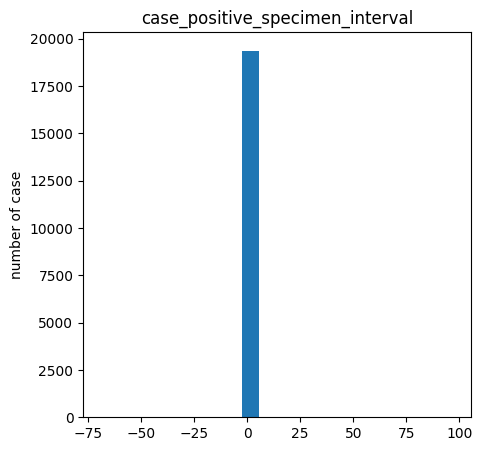

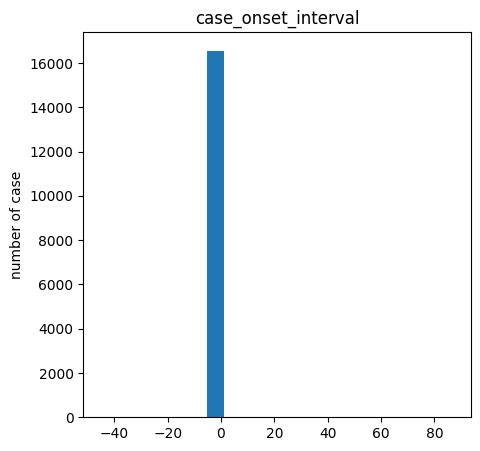

In [28]:
for col in numeric_columns:
        f = df[col].plot(kind='hist', figsize=(5,5), bins=20)
        plt.title(col)
        plt.ylabel('number of case')
        plt.show()    

<b>Boxplot for Continuous Features:</b>

case_positive_specimen_interval       AxesSubplot(0.125,0.11;0.352273x0.77)
case_onset_interval                AxesSubplot(0.547727,0.11;0.352273x0.77)
dtype: object

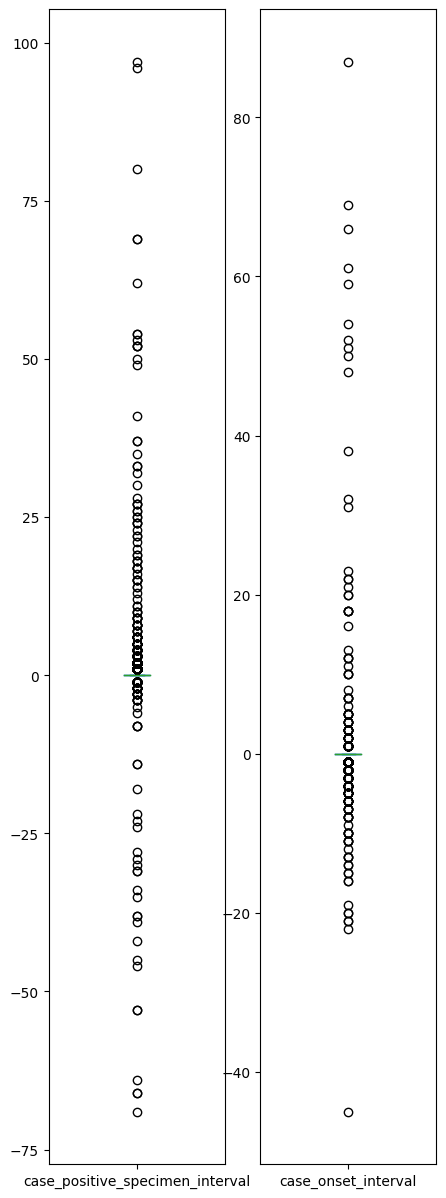

In [29]:
df[numeric_columns].plot(kind='box', subplots=True, figsize=(5,15), sharex=False, sharey=False)

<b>Timeseries  for Continuous Features:</b>

Text(0.5, 1.0, 'Number of Cases with Date')

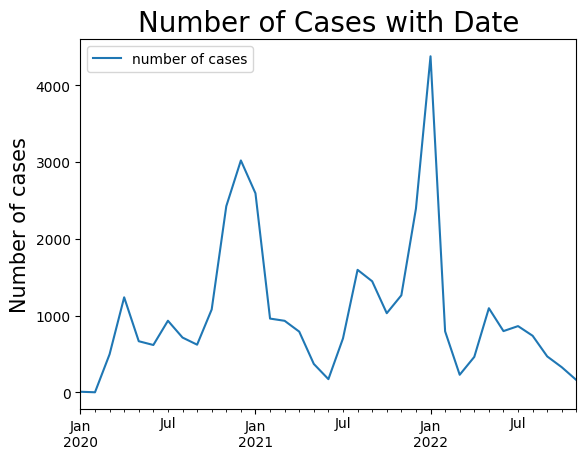

In [30]:
# create timeseries plot
dt.plot()
plt.ylabel("Number of cases", size = 15)
plt.title("Number of Cases with Date", size = 20)

<AxesSubplot: >

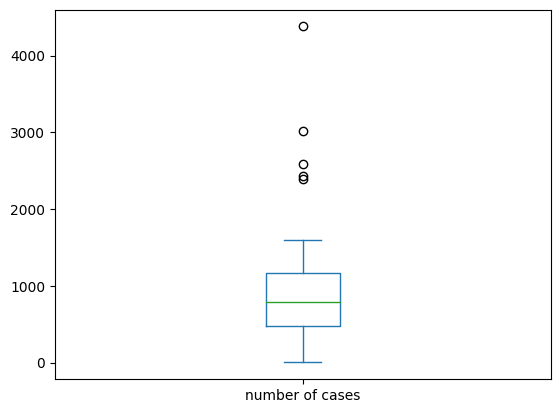

In [31]:
dt.plot.box()

<b>Bar Plot for Categorical Features:</b>

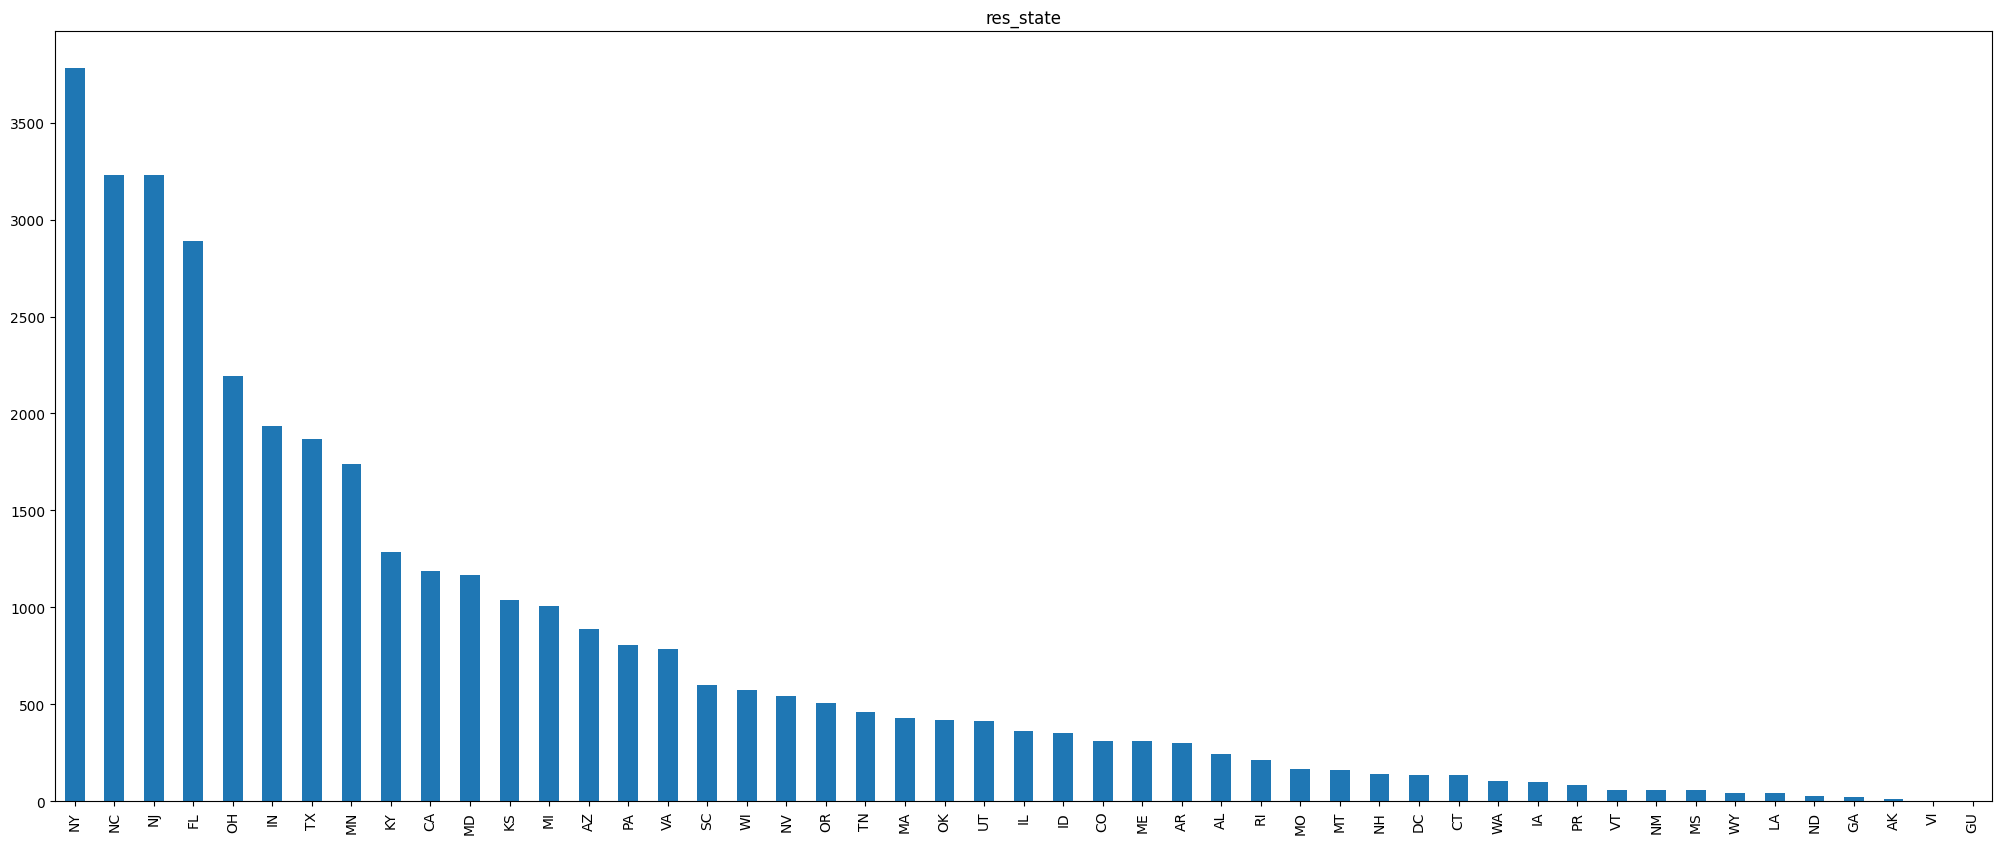

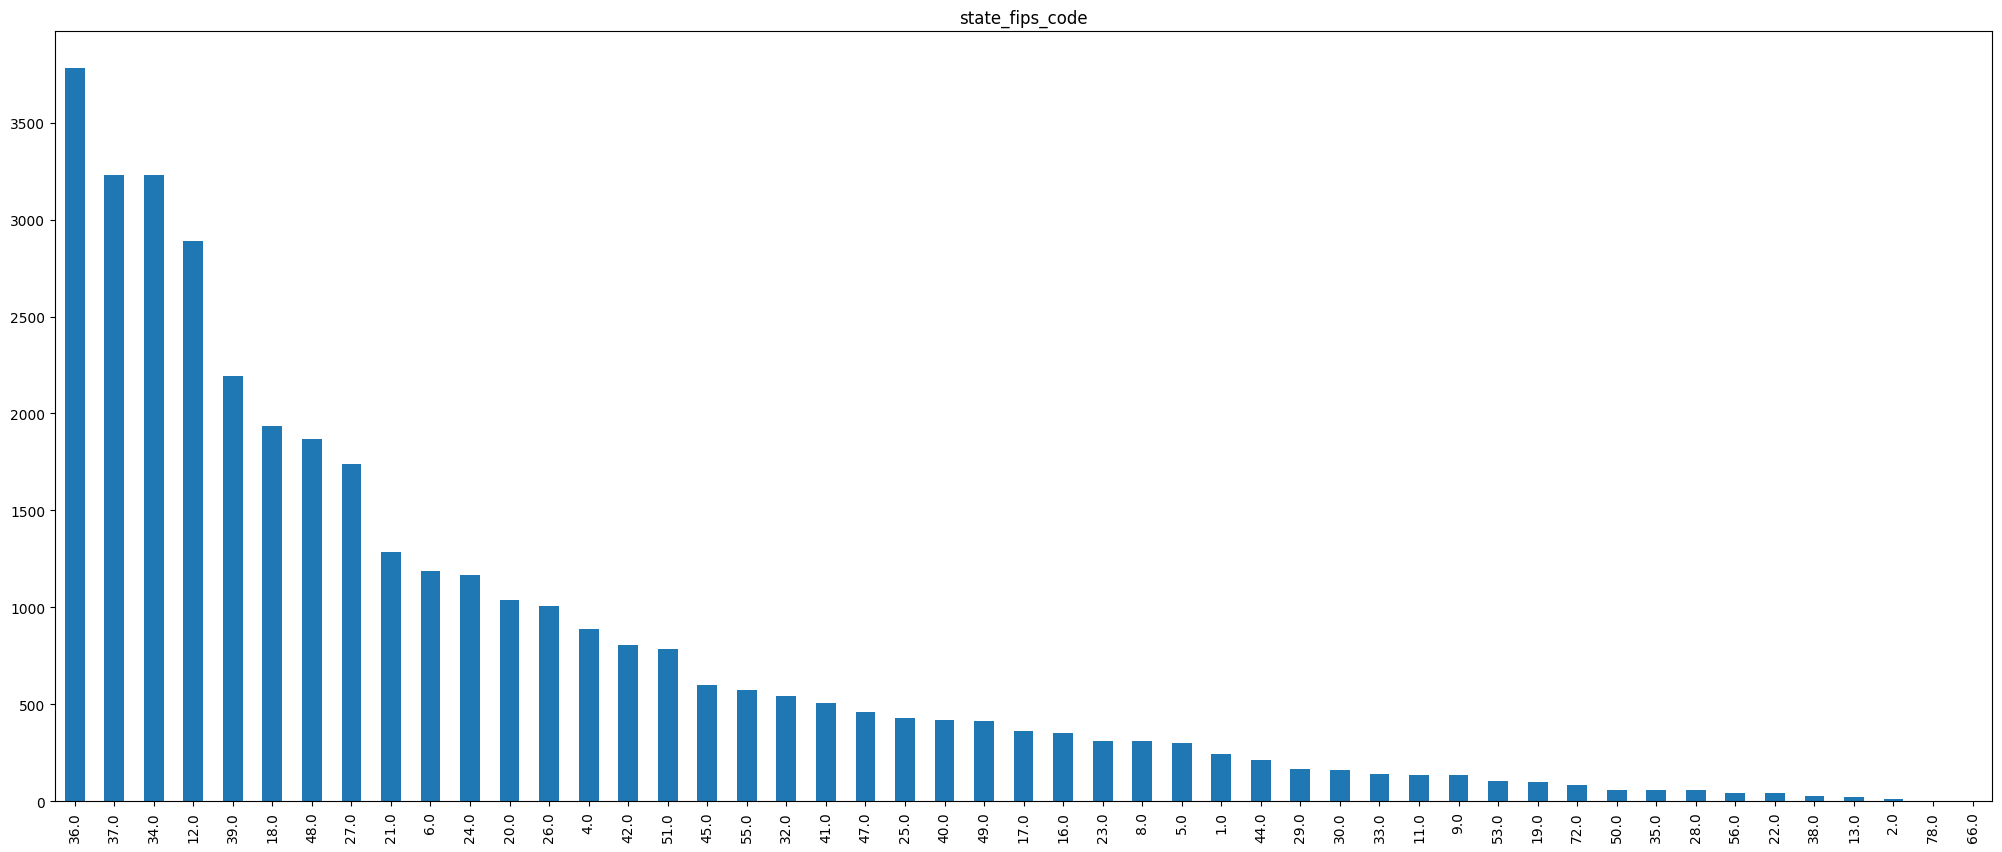

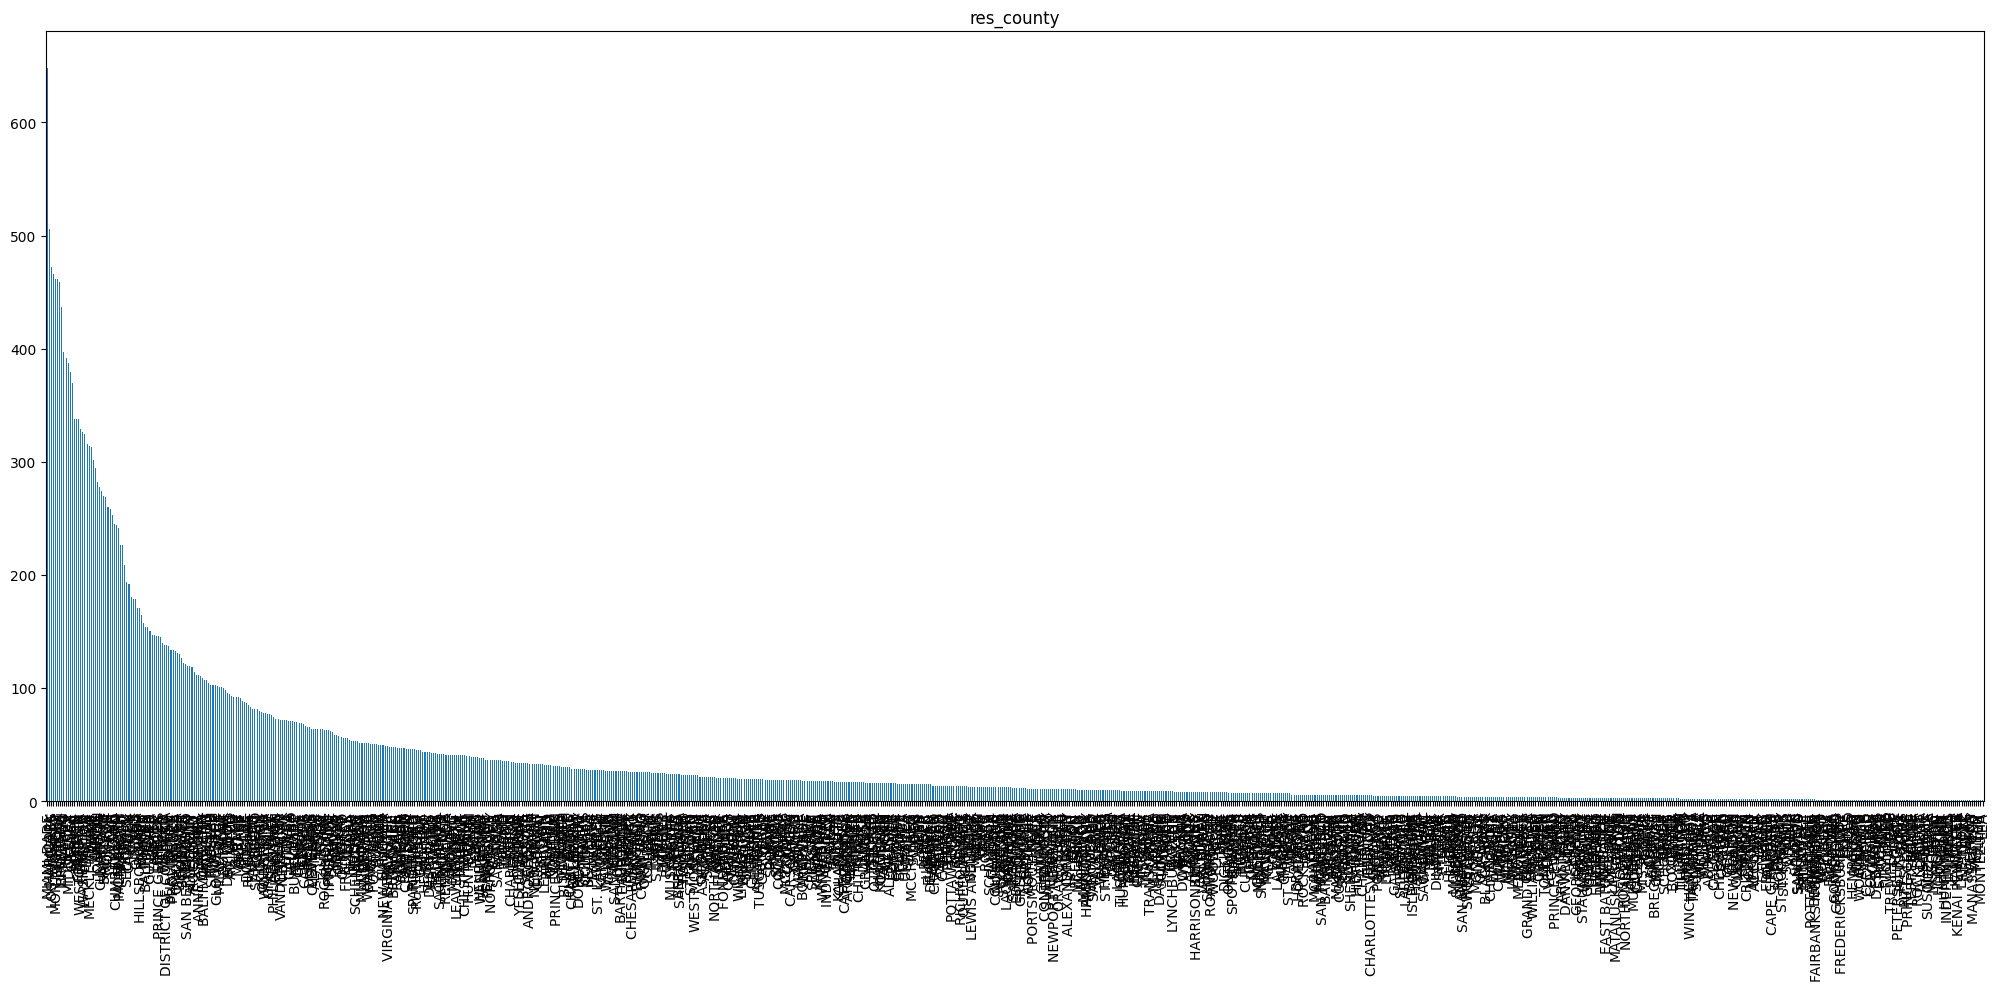

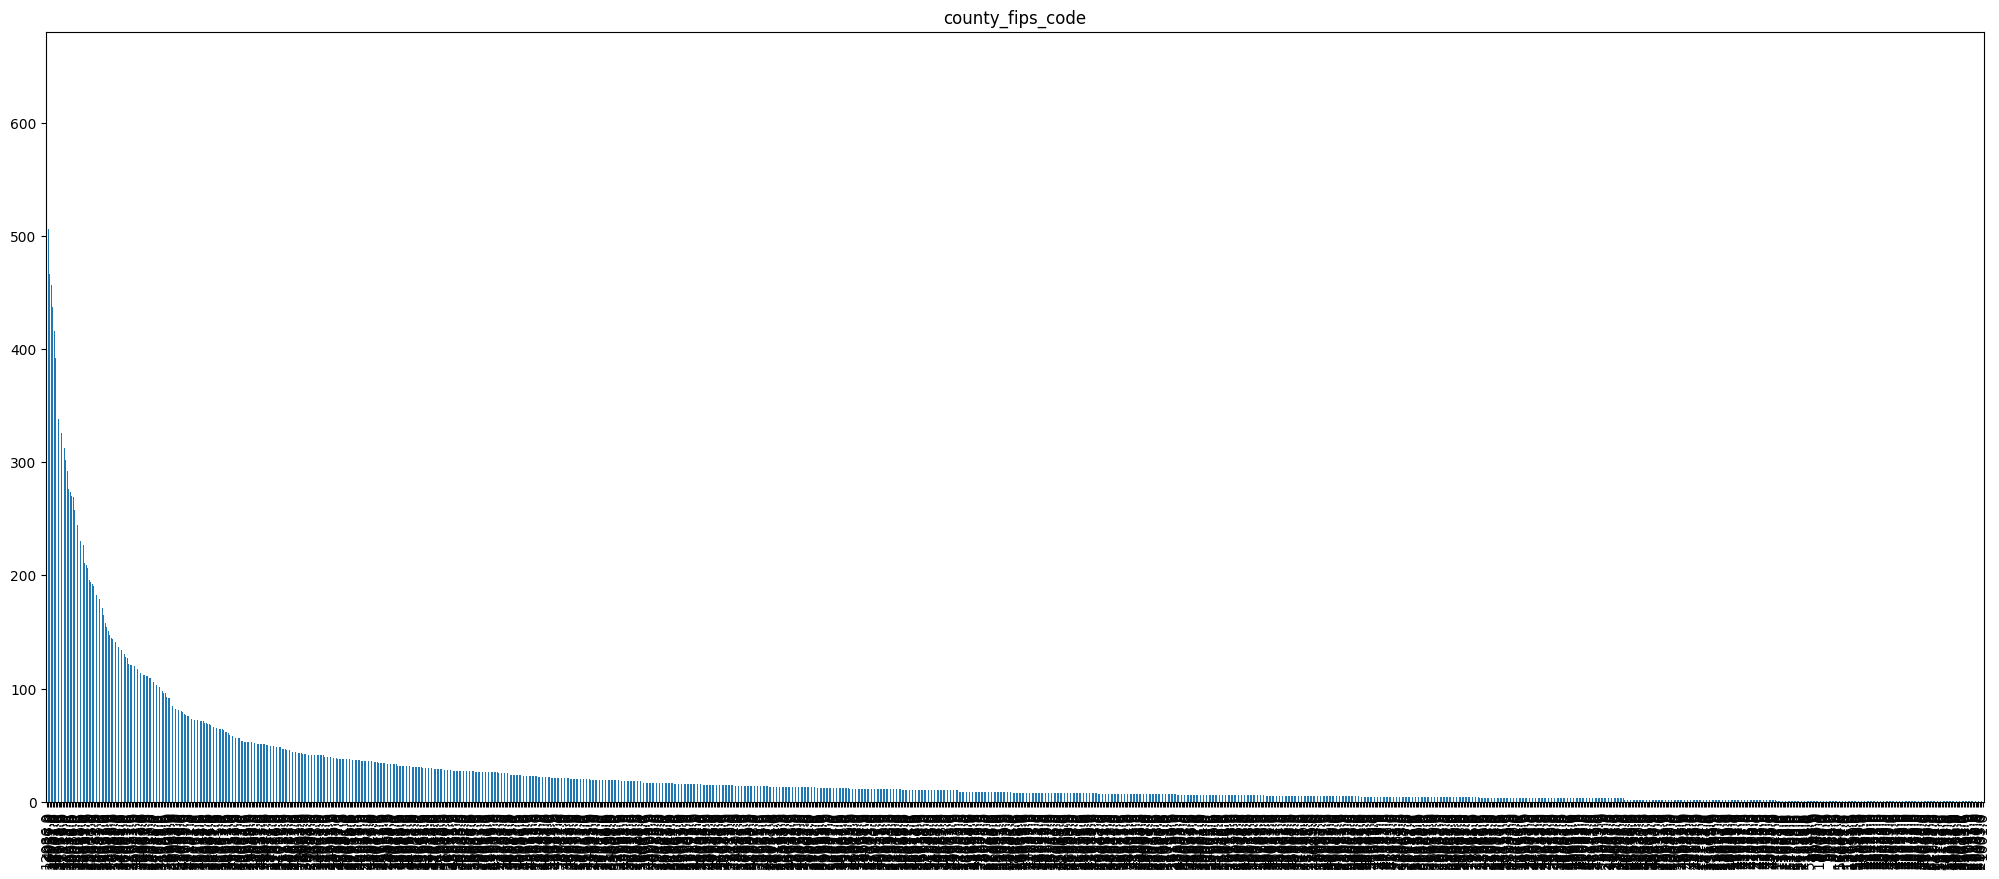

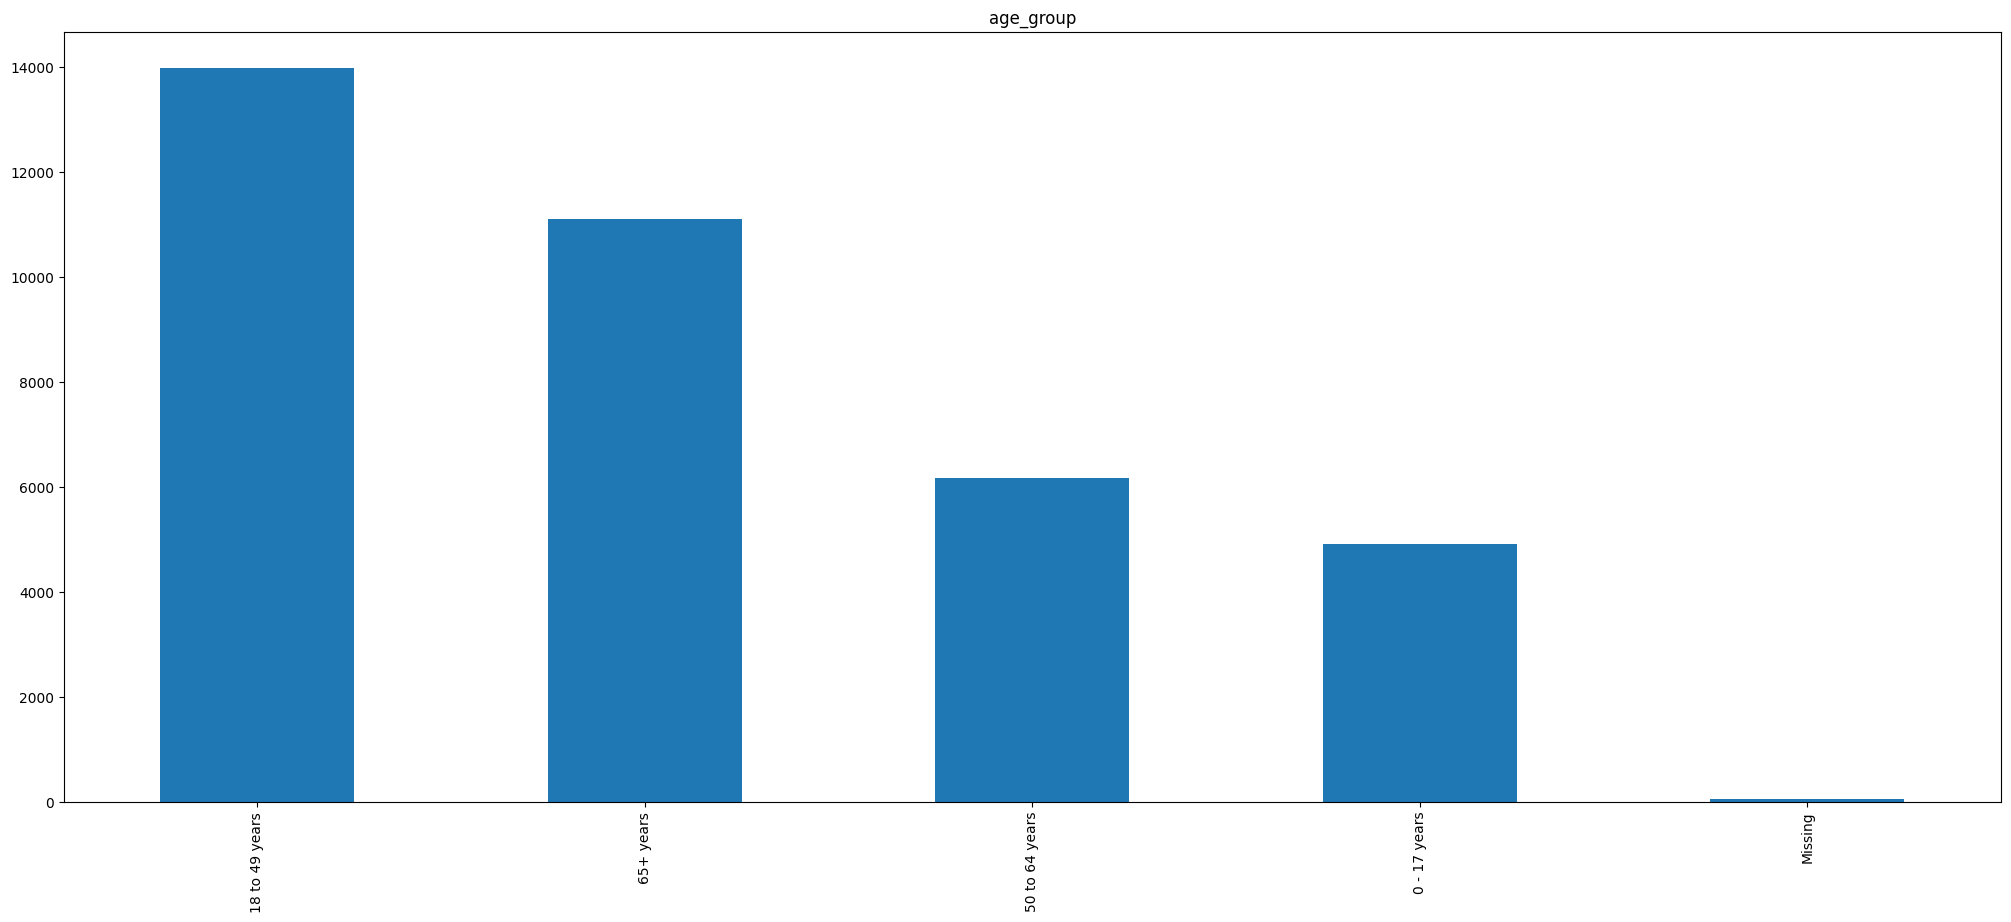

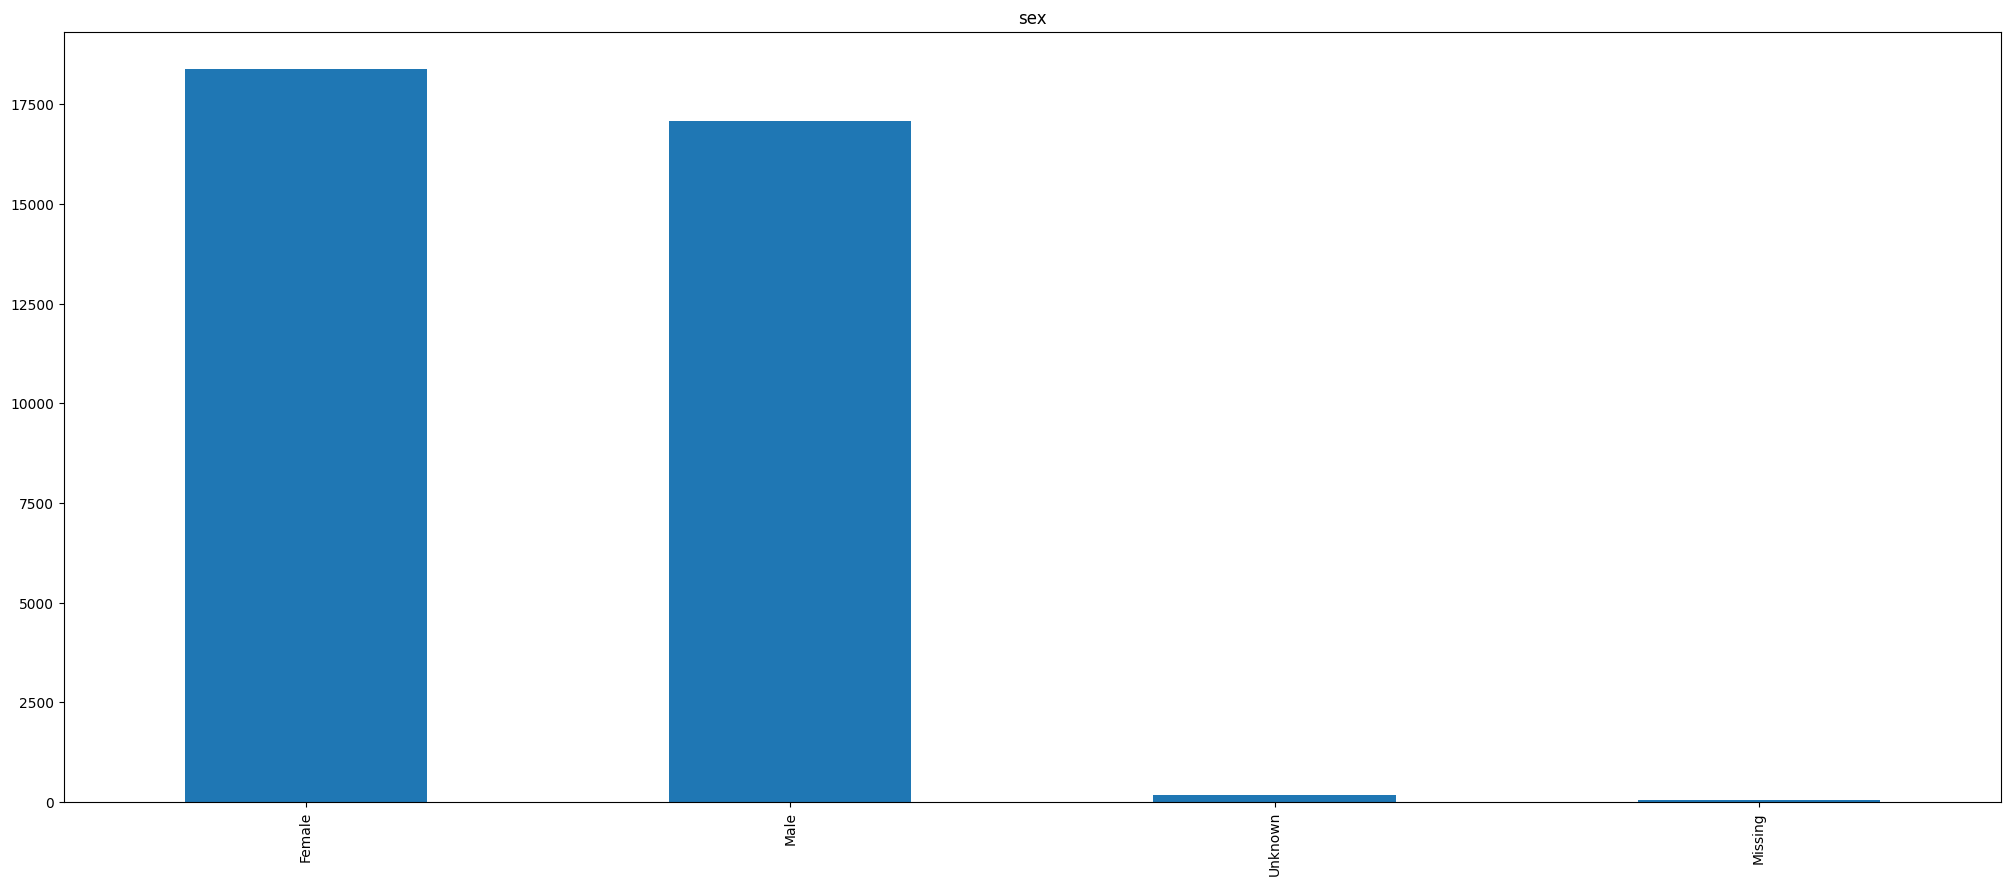

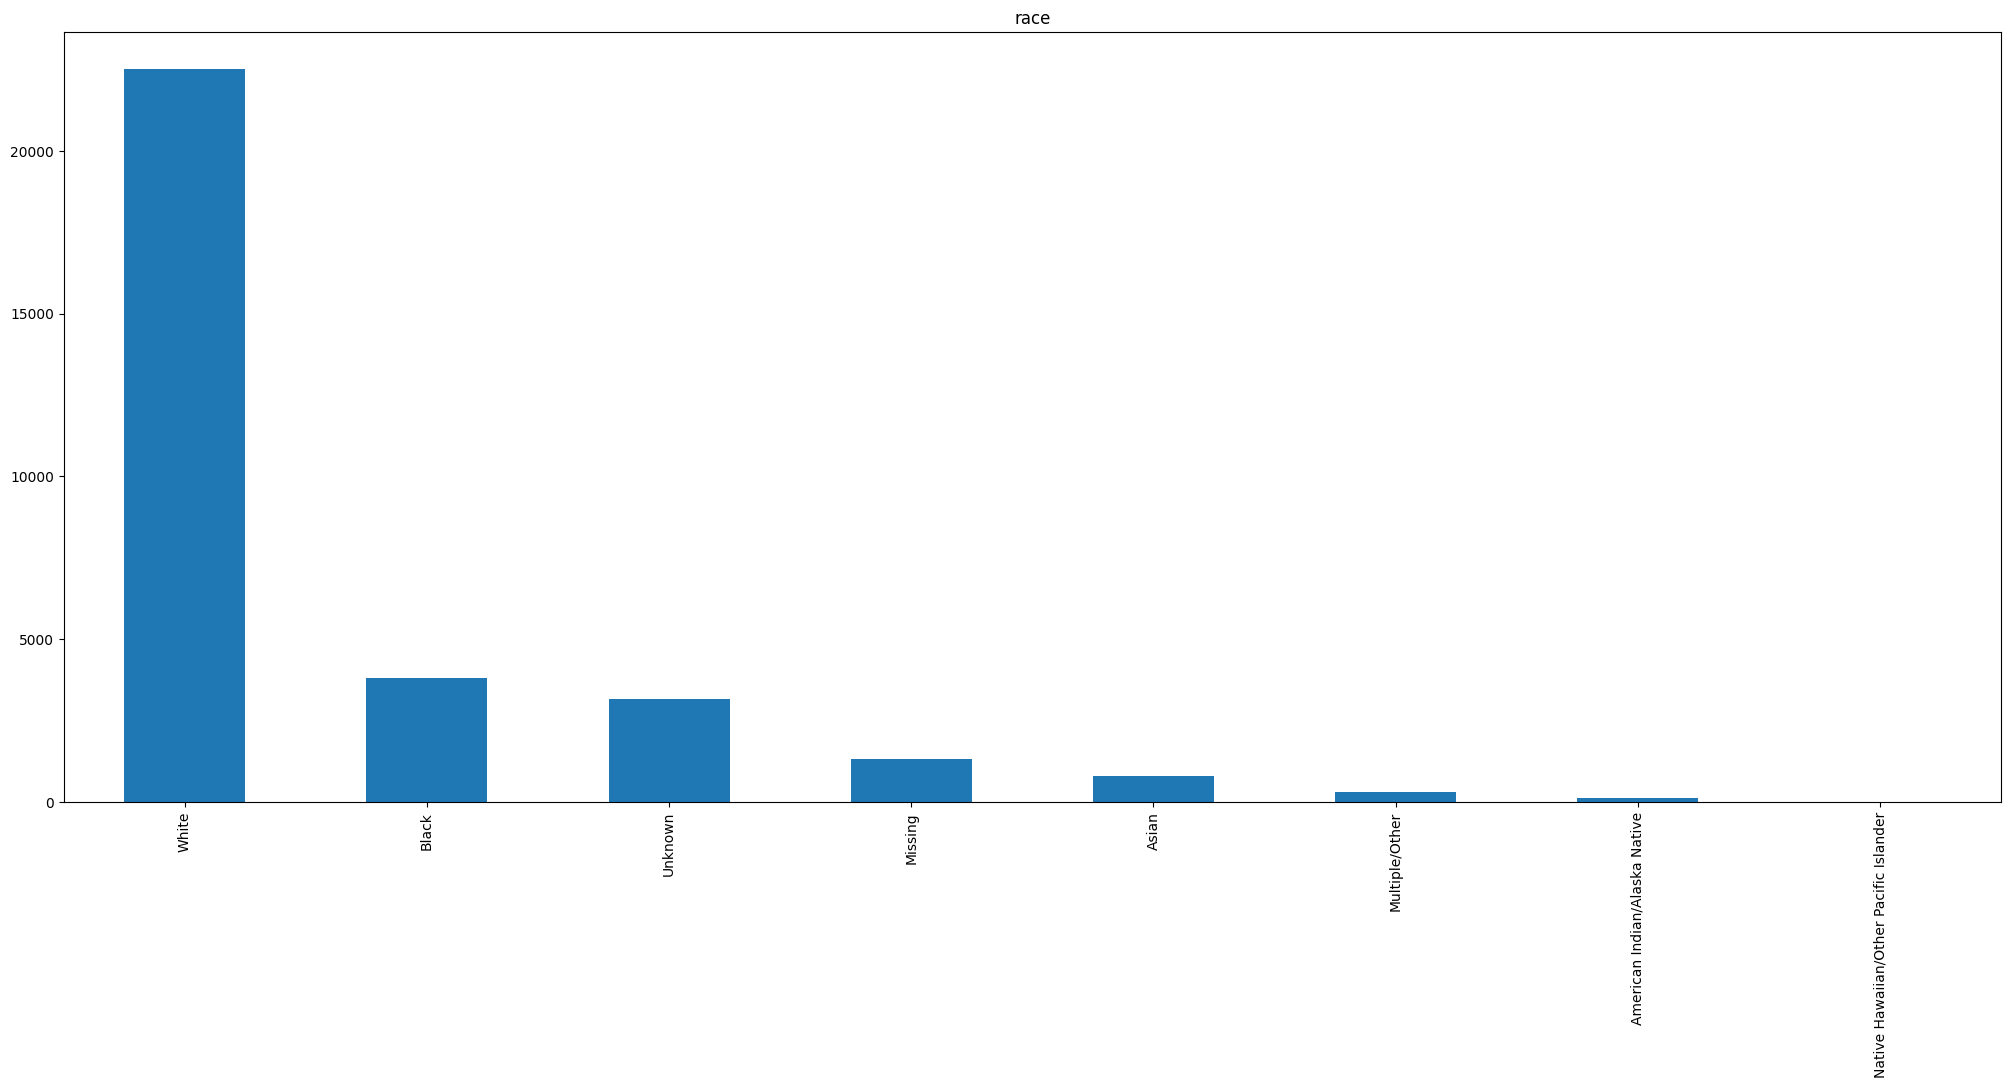

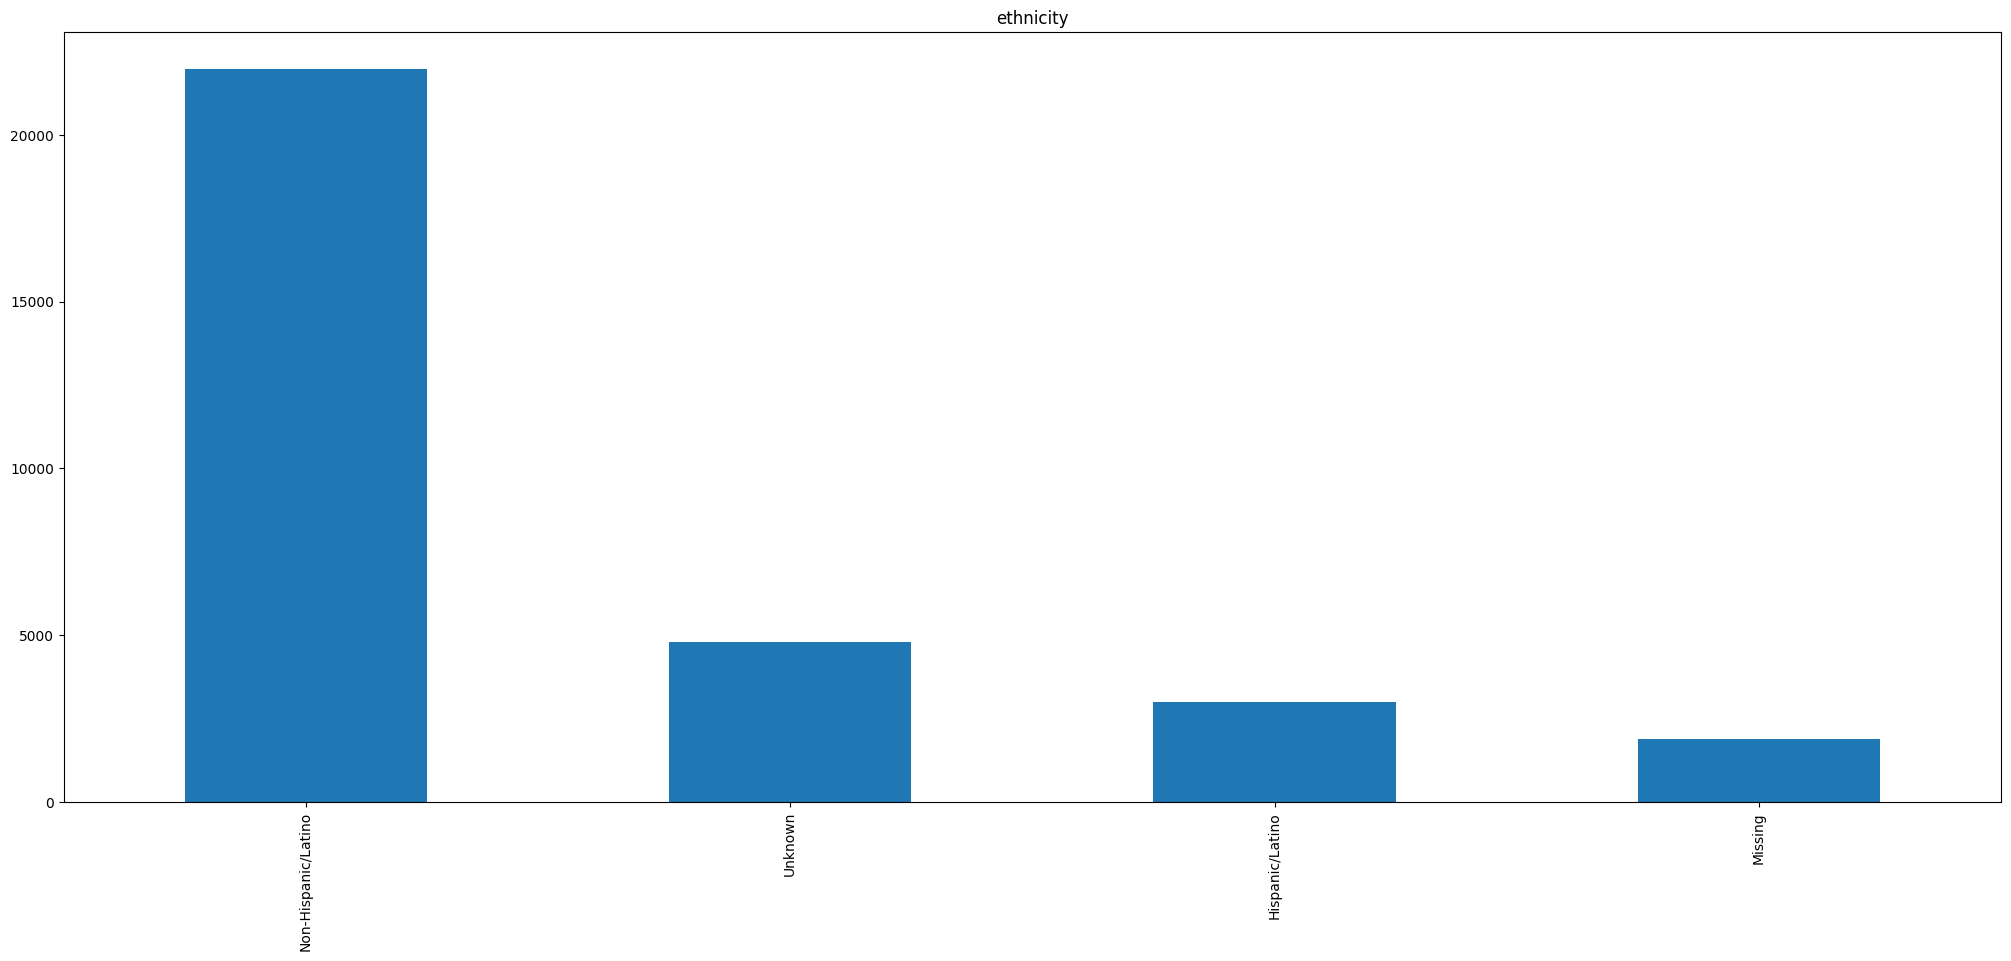

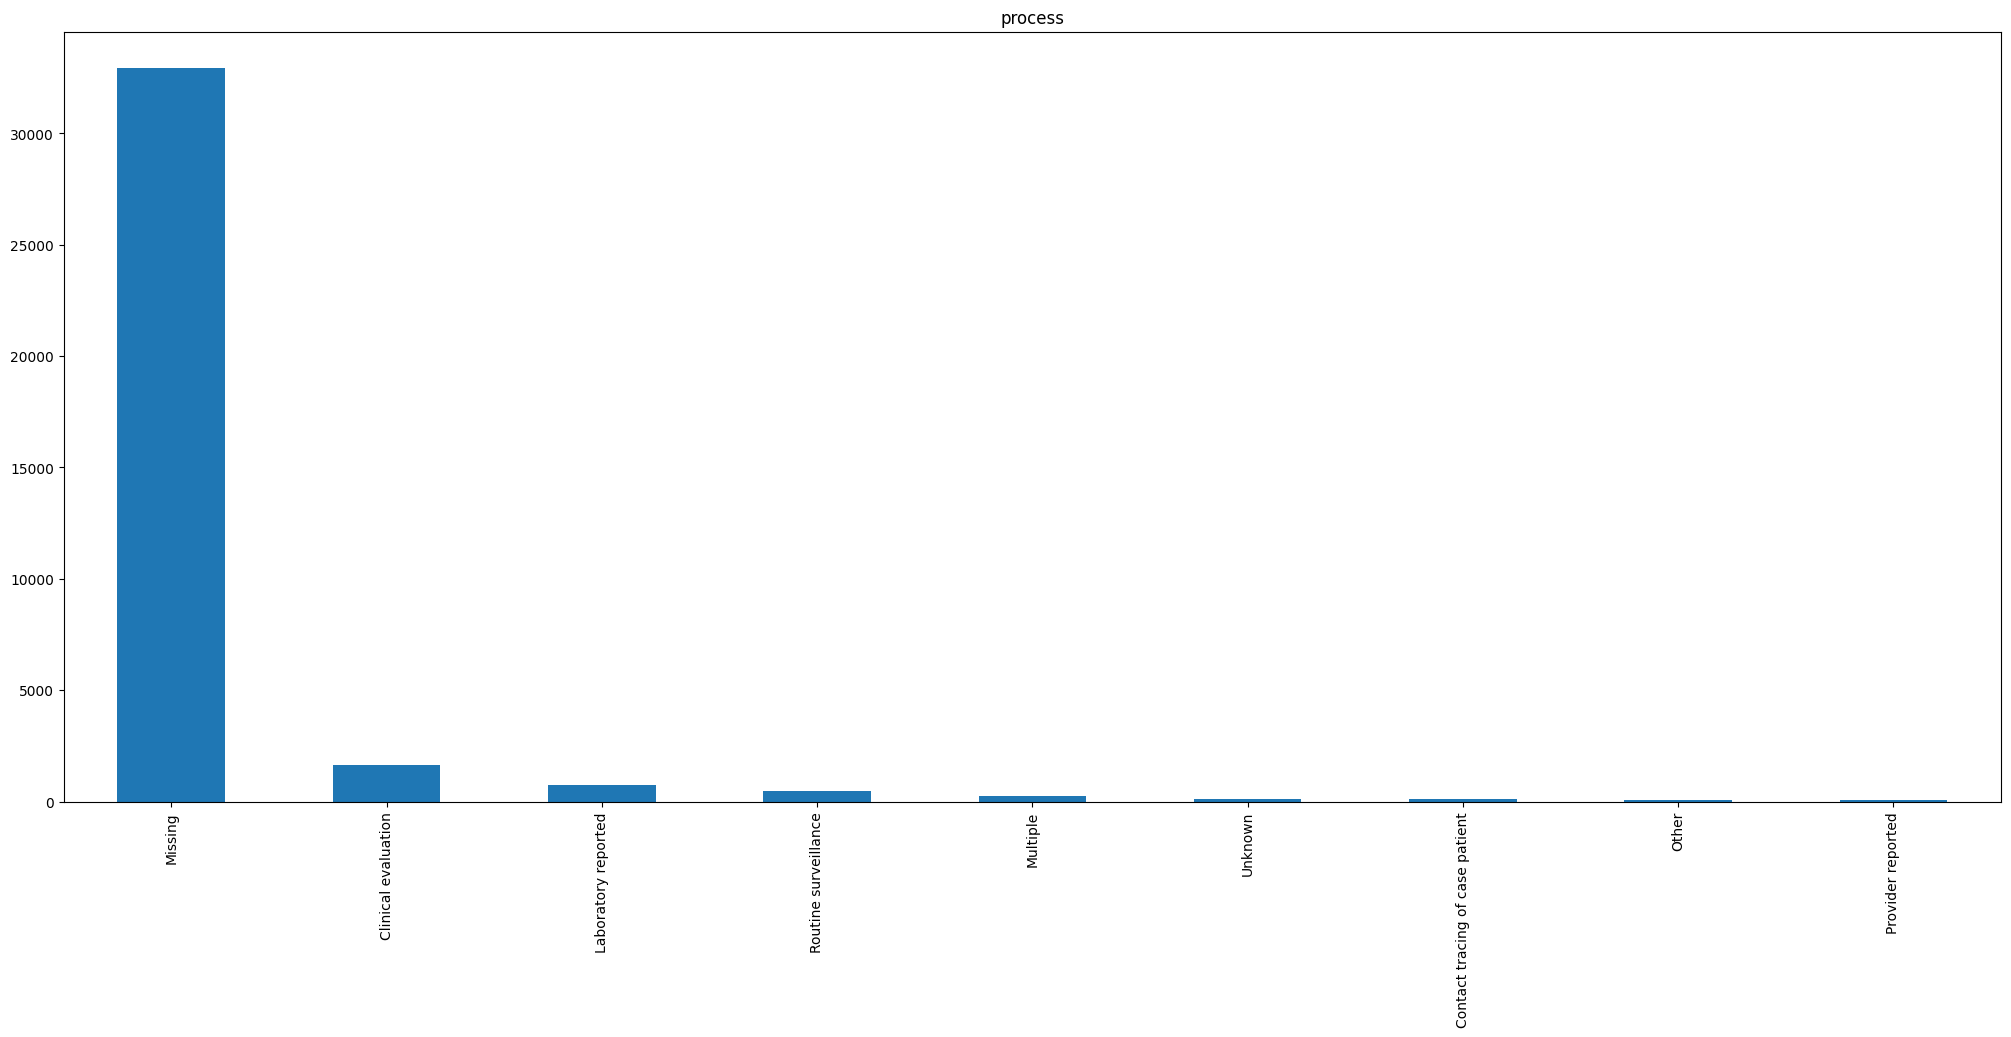

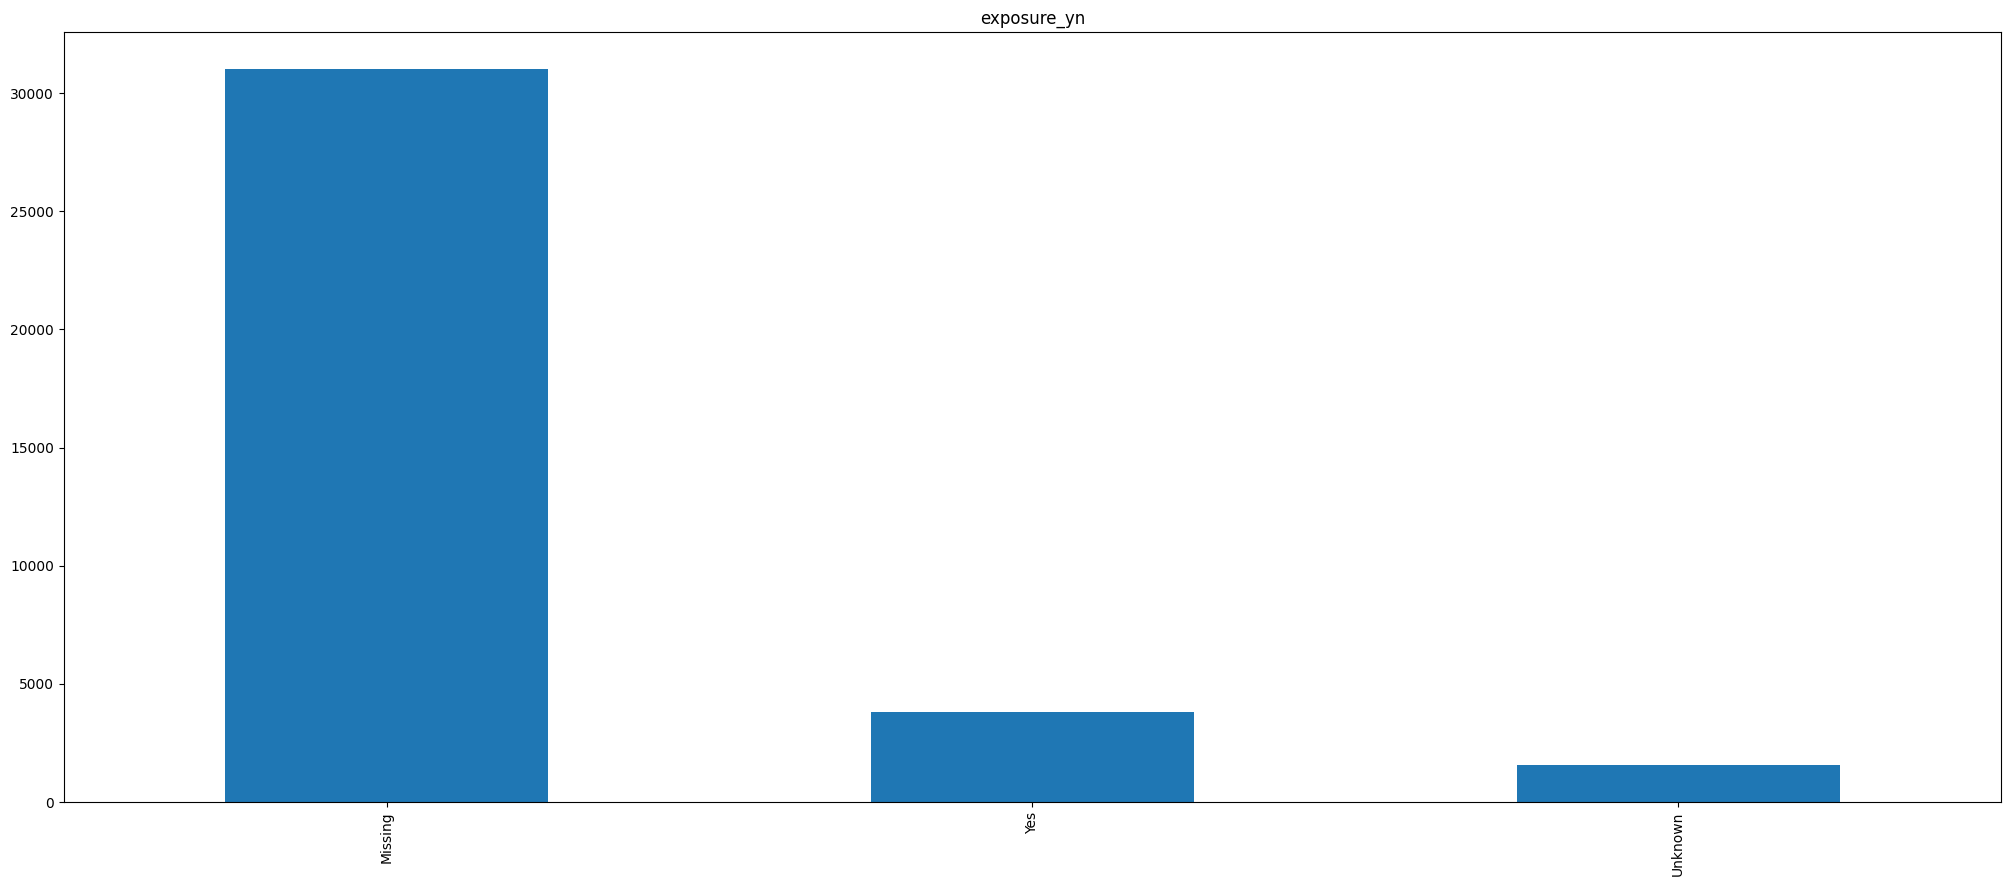

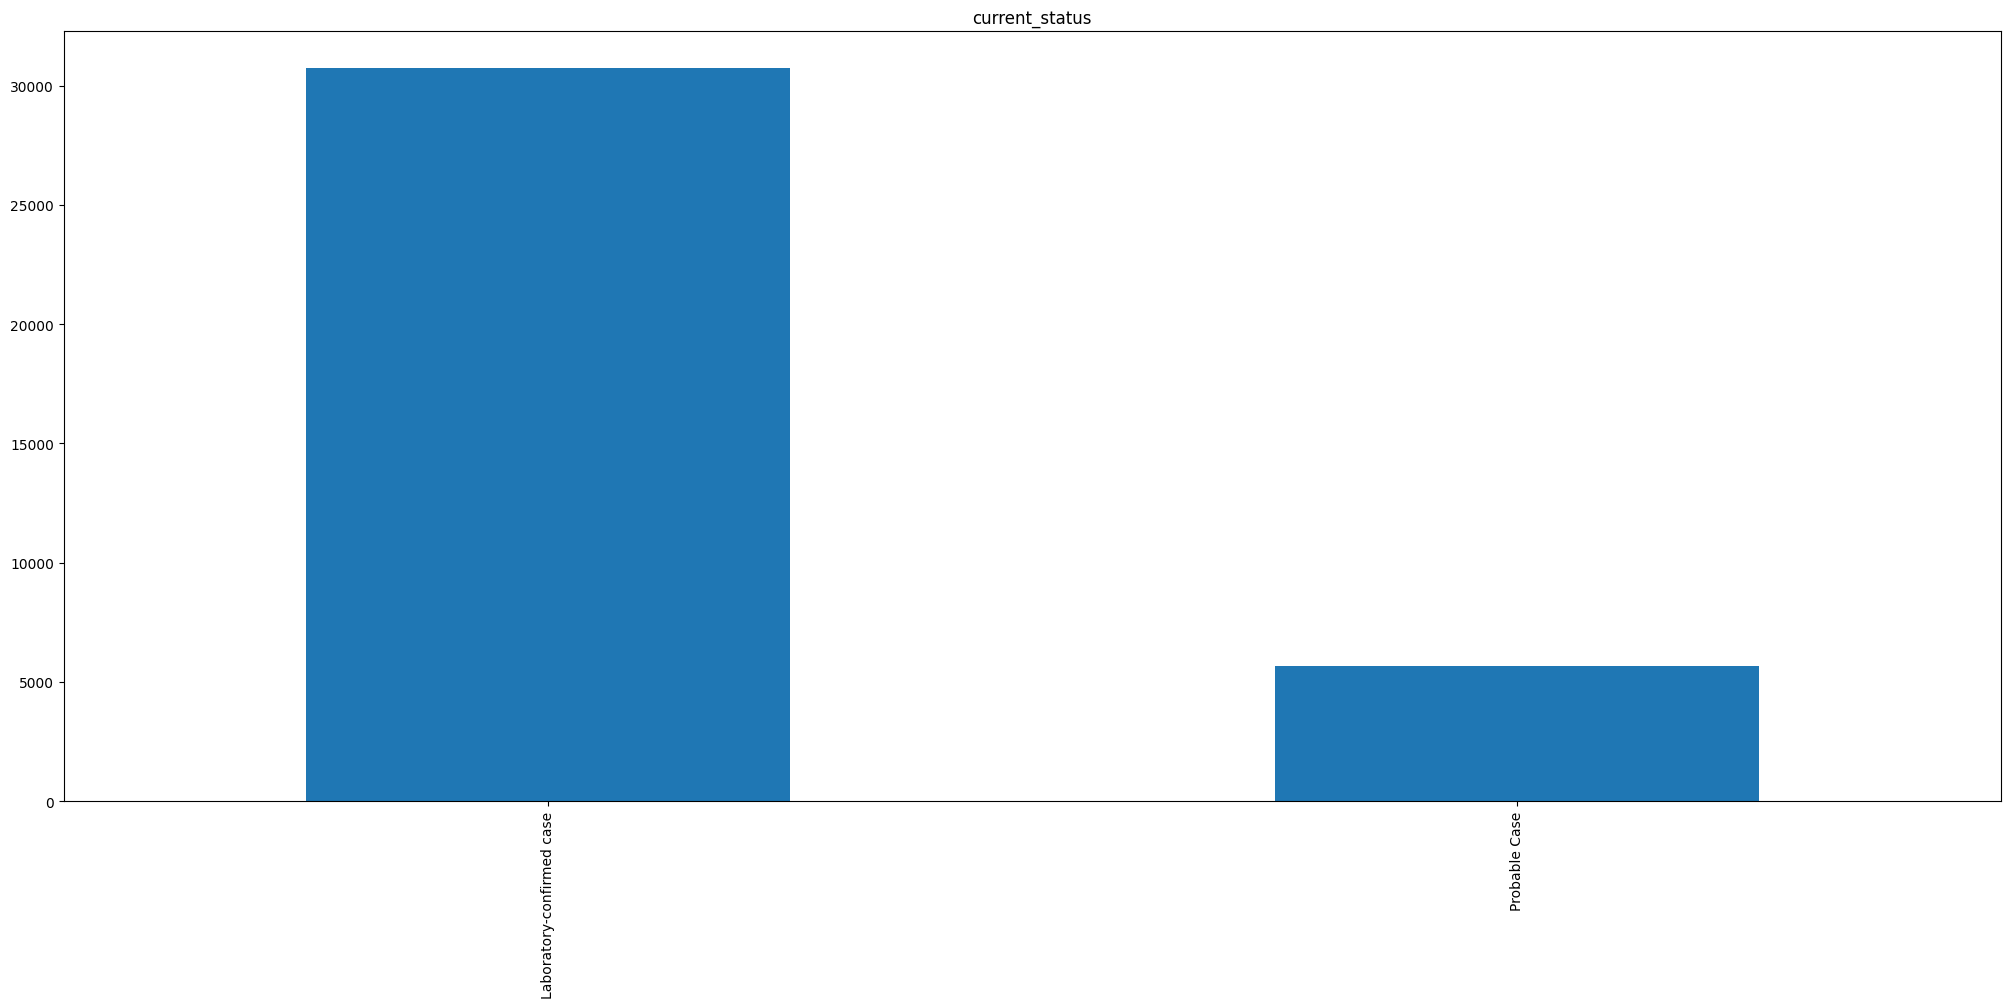

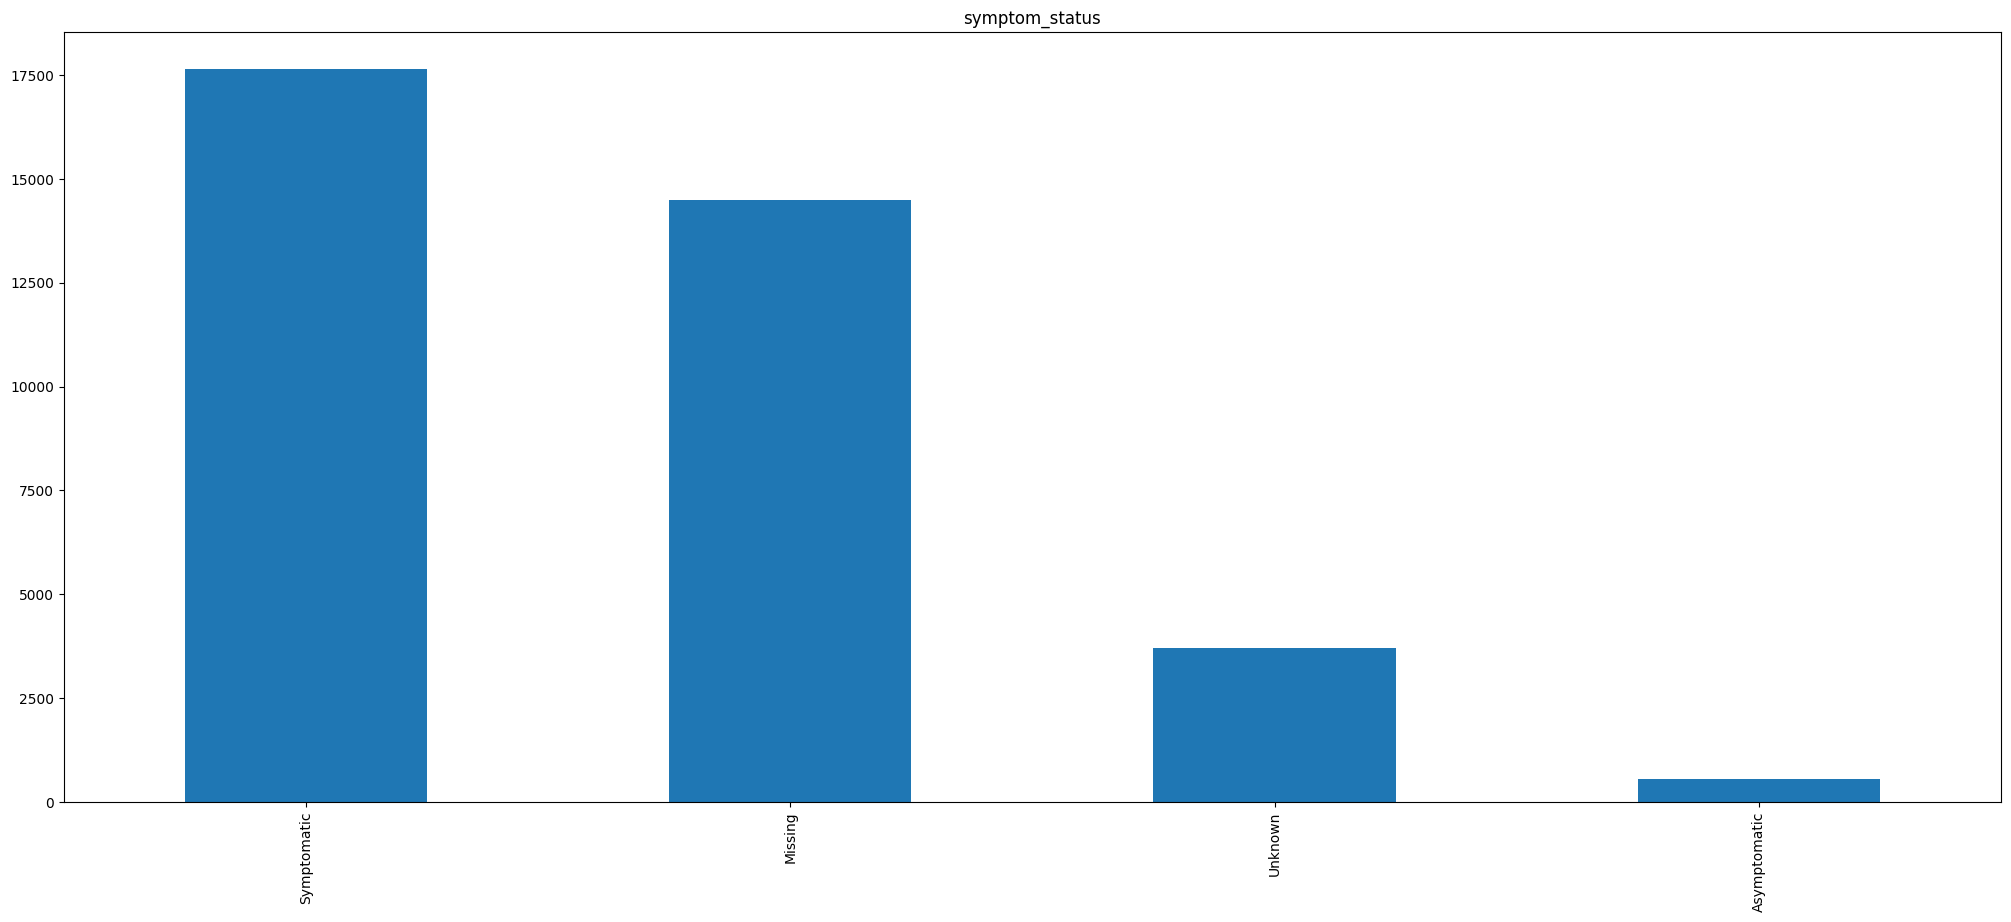

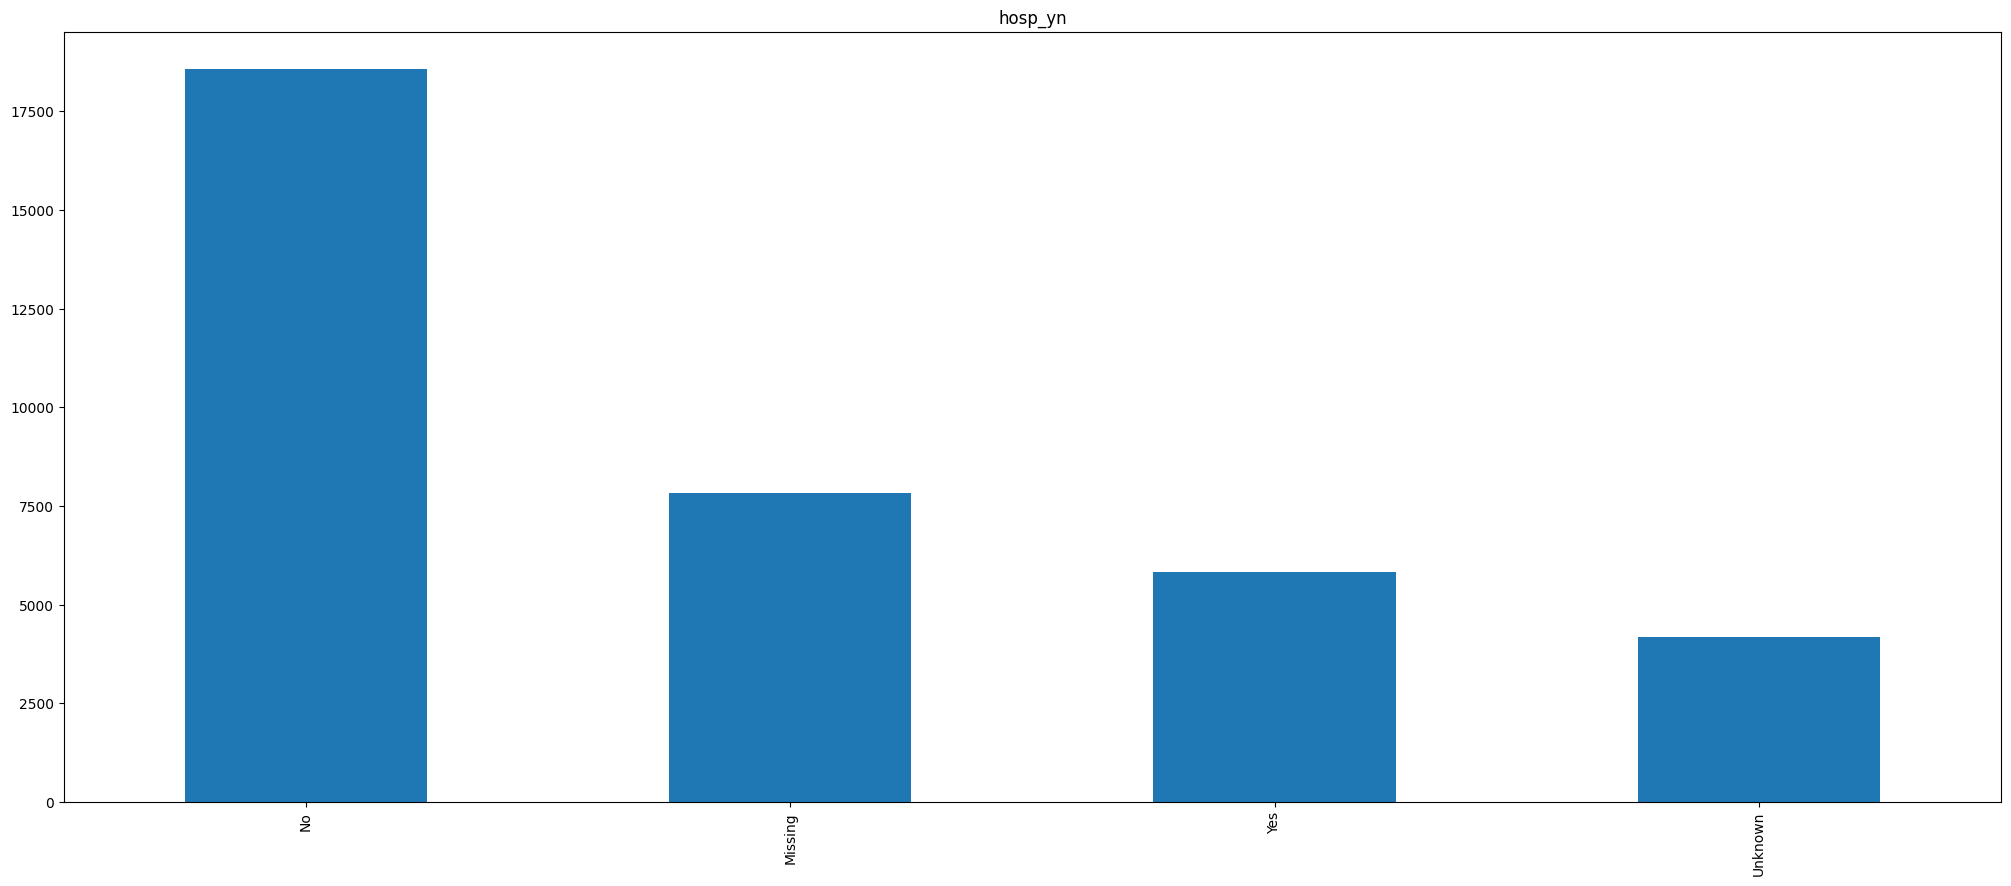

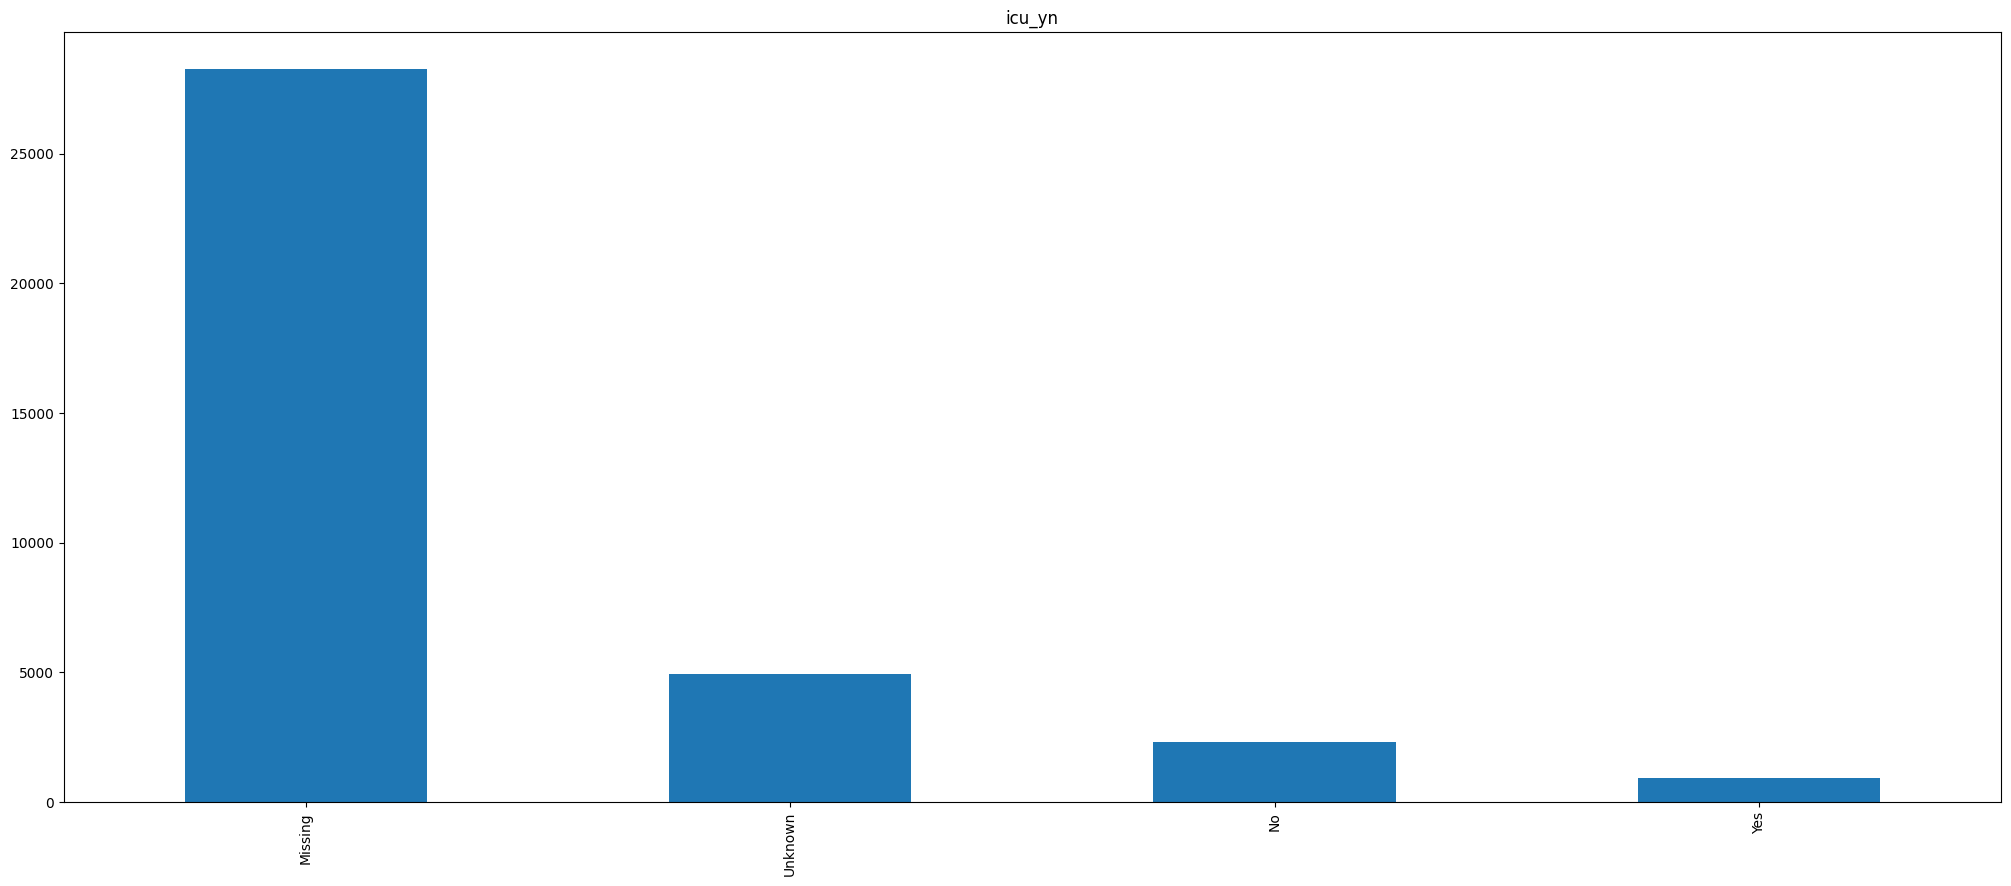

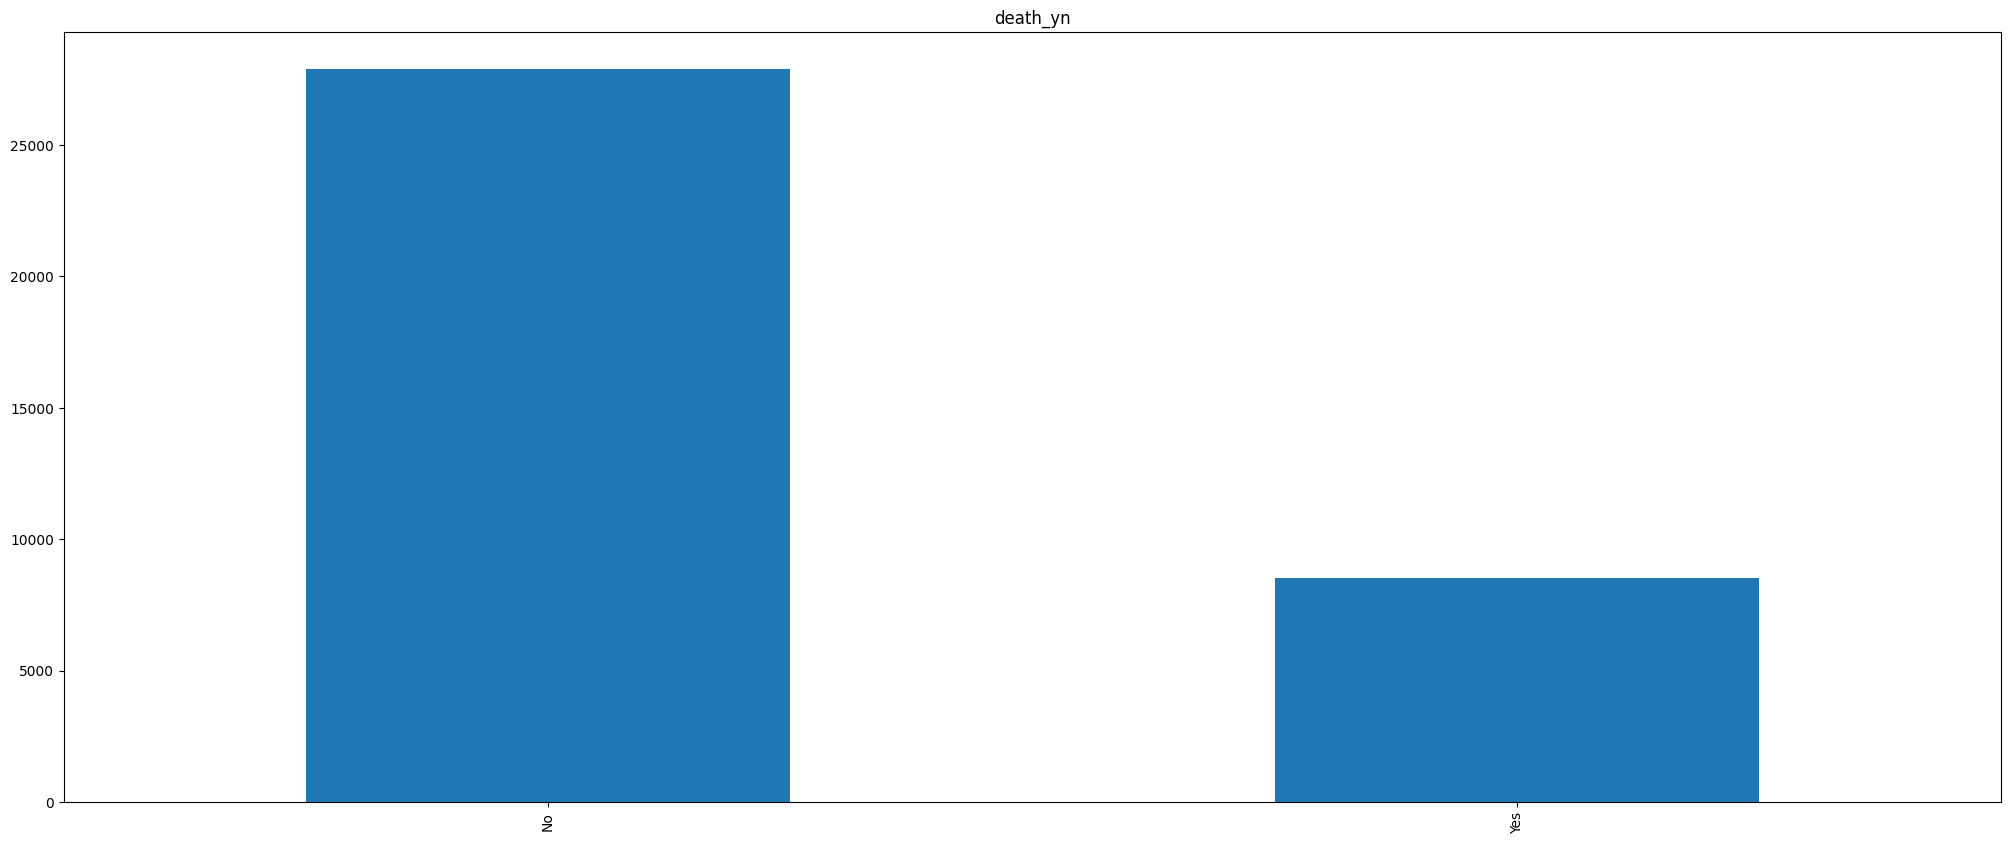

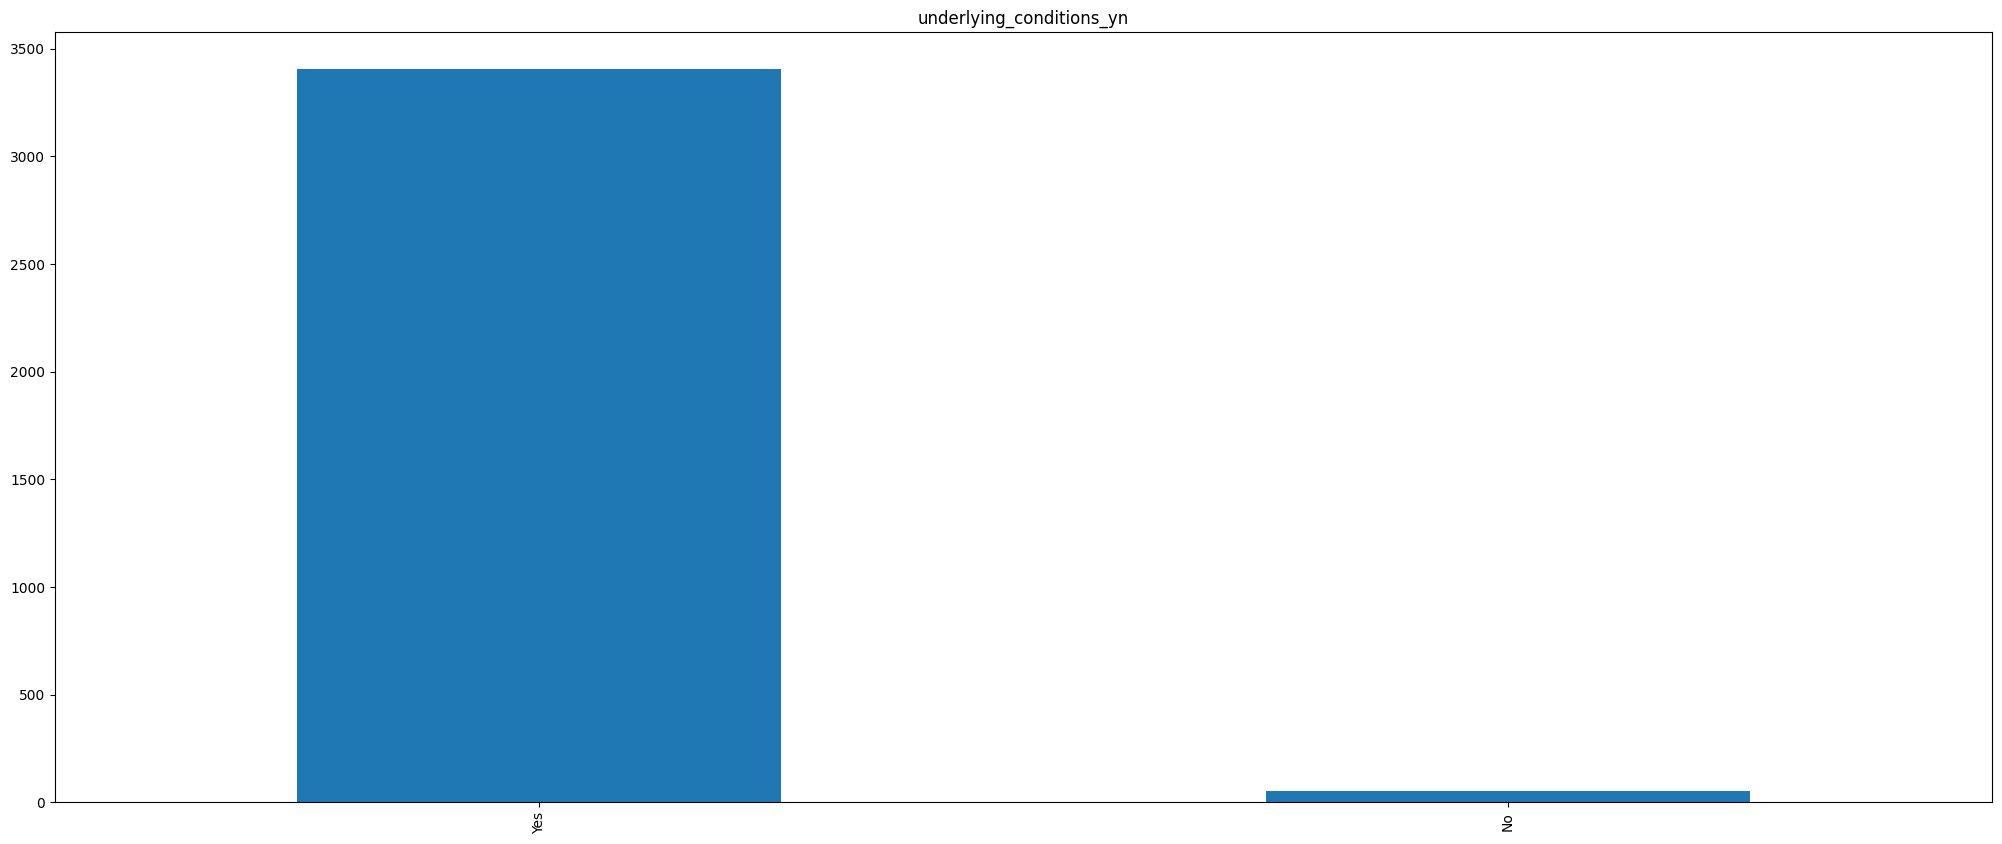

In [32]:
for col in category_columns:
        f = df[col].value_counts().plot(kind='bar', figsize=(25,10))
        plt.title(col)
#         plt.savefig(col +'.png')
        plt.show()

### Problems identified in "Data_Quality_Report_Initial_Findings.pdf"
i. Large amount of missing data presented in several features (check pdf report for details).<br>
ii. Null values for unique identifier "county_fips_code"<br>
iii. Duplicate feature columns that represents the same meaning<br>
iv. "Missing" and "Unknown" data which has vague meaning presented in several features (check pdf report for details).<br>

### Solutions to deal with the problems identified
i. Drop feature with hugh "missing" data that would not be important for our problem: <br> "case_positive_specimen_interval", "case_onset_interval", "process", "exposure_yn", "symptom_status" <br><br> 
ii. Drop feature that has duplicate meaning: <br> “res_state", "res_county", "state_fips_code"<br><br>
iii. Combine data together to one missing data entry category:<br> "age_group", "sex", "race", "ethnicity", "hosp_yn", "icu_yn", "underlying_conditions_yn" <br><br>

<b>Action 1:</b> Drop features with missing data that is less relevant to the problem<br><br>
"case_positive_specimen_interval", "case_onset_interval", "process", "exposure_yn", "symptom_status"

In [33]:
df.drop('case_positive_specimen_interval', inplace=True, axis=1)
df.drop('case_onset_interval', inplace=True, axis=1)
df.drop('process', inplace=True, axis=1)
df.drop('exposure_yn', inplace=True, axis=1)
df.drop('symptom_status', inplace=True, axis=1)

In [34]:
# check the updated columns
print(df.columns)


Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'current_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'underlying_conditions_yn'],
      dtype='object')


<b>Action 2:</b> Drop features sith duplicate meaning <br><br>“res_state", "res_county", 'state_fips_code'

In [35]:
df.drop('res_state', inplace=True, axis=1)
df.drop('res_county', inplace=True, axis=1)
df.drop('state_fips_code', inplace=True, axis=1)

In [36]:
# check the updated columns
print(df.columns)

Index(['case_month', 'county_fips_code', 'age_group', 'sex', 'race',
       'ethnicity', 'current_status', 'hosp_yn', 'icu_yn', 'death_yn',
       'underlying_conditions_yn'],
      dtype='object')


<b>Action 3:</b> Combine data together to one missing column:<br><br>
"age_group", "sex", "race", "ethnicity", "hosp_yn", "icu_yn", "underlying_conditions_yn" 

1. age_group

In [37]:
#showing the different unique data in the column
df['age_group'].unique()

['65+ years', '18 to 49 years', '50 to 64 years', 'Missing', NaN, '0 - 17 years']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Missing']

In [38]:
# replace "unknown" to missing
df['age_group'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['age_group'].fillna("Missing", inplace=True)

#checking no null left
df['age_group'].isnull().sum()

0

In [39]:
#checking whether the data are combined
df['age_group'].unique()

['65+ years', '18 to 49 years', '50 to 64 years', 'Missing', '0 - 17 years']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Missing']

2. sex

In [40]:
#showing the different unique data in the column
df['sex'].unique()

['Female', 'Male', 'Unknown', NaN, 'Missing']
Categories (4, object): ['Female', 'Male', 'Missing', 'Unknown']

In [41]:
# replace "unknown" to missing
df['sex'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['sex'].fillna("Missing", inplace=True)

#checking no null left
df['sex'].isnull().sum()

0

In [42]:
#checking whether the data are combined
df['sex'].unique()

['Female', 'Male', 'Missing']
Categories (3, object): ['Female', 'Male', 'Missing']

3. race

In [43]:
#showing the different unique data in the column
df['race'].unique()

['Multiple/Other', 'Asian', 'White', 'Unknown', NaN, 'Black', 'Missing', 'American Indian/Alaska Native', 'Native Hawaiian/Other Pacific Islander']
Categories (8, object): ['American Indian/Alaska Native', 'Asian', 'Black', 'Missing', 'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'Unknown', 'White']

In [44]:
# replace "unknown" to missing
df['race'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['race'].fillna("Missing", inplace=True)

#checking no null left
df['race'].isnull().sum()

0

In [45]:
#checking whether the data are combined
df['race'].unique()

['Multiple/Other', 'Asian', 'White', 'Missing', 'Black', 'American Indian/Alaska Native', 'Native Hawaiian/Other Pacific Islander']
Categories (7, object): ['American Indian/Alaska Native', 'Asian', 'Black', 'Missing', 'Multiple/Other', 'Native Hawaiian/Other Pacific Islander', 'White']

4. ethnicity

In [46]:
#showing the different unique data in the column
df['ethnicity'].unique()

['Non-Hispanic/Latino', 'Hispanic/Latino', NaN, 'Unknown', 'Missing']
Categories (4, object): ['Hispanic/Latino', 'Missing', 'Non-Hispanic/Latino', 'Unknown']

In [47]:
# replace "unknown" to missing
df['ethnicity'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['ethnicity'].fillna("Missing", inplace=True)

#checking no null left
df['ethnicity'].isnull().sum()

0

In [48]:
#checking whether the data are combined
df['ethnicity'].unique()

['Non-Hispanic/Latino', 'Hispanic/Latino', 'Missing']
Categories (3, object): ['Hispanic/Latino', 'Missing', 'Non-Hispanic/Latino']

5. hosp_yn

In [49]:
#showing the different unique data in the column
df['hosp_yn'].unique()

['Yes', 'Missing', 'No', 'Unknown']
Categories (4, object): ['Missing', 'No', 'Unknown', 'Yes']

In [50]:
# replace "unknown" to missing
df['hosp_yn'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['hosp_yn'].fillna("Missing", inplace=True)

#checking no null left
df['hosp_yn'].isnull().sum()

0

In [51]:
#checking whether the data are combined
df['hosp_yn'].unique()

['Yes', 'Missing', 'No']
Categories (3, object): ['Missing', 'No', 'Yes']

6. icu_yn

In [52]:
#showing the different unique data in the column
df['icu_yn'].unique()

['Missing', 'Yes', 'Unknown', 'No']
Categories (4, object): ['Missing', 'No', 'Unknown', 'Yes']

In [53]:
# replace "unknown" to missing
df['icu_yn'].replace(["Unknown"], 'Missing',inplace=True)

#Filling the null values with 'Missing
df['icu_yn'].fillna("Missing", inplace=True)

#checking no null left
df['icu_yn'].isnull().sum()

0

In [54]:
#checking whether the data are combined
df['icu_yn'].unique()

['Missing', 'Yes', 'No']
Categories (3, object): ['Missing', 'No', 'Yes']

7. underlying_conditions_yn

In [55]:
#showing the different unique data in the column
df['underlying_conditions_yn'].unique()

[NaN, 'Yes', 'No']
Categories (2, object): ['No', 'Yes']

In [56]:
#Adding a 'Missing' category 
df['underlying_conditions_yn'] = df['underlying_conditions_yn'].cat.add_categories(['Missing'])

In [57]:
#Filling the null values with 'Missing
df['underlying_conditions_yn'].fillna("Missing", inplace=True)

#checking no null left
df['underlying_conditions_yn'].isnull().sum()

0

In [58]:
#checking whether the data are combined
df['underlying_conditions_yn'].unique()

['Missing', 'Yes', 'No']
Categories (3, object): ['No', 'Yes', 'Missing']

## Checking the Cleaned Data

In [59]:
#Checking no null data left
df.isnull().sum()

case_month                     0
county_fips_code            2207
age_group                      0
sex                            0
race                           0
ethnicity                      0
current_status                 0
hosp_yn                        0
icu_yn                         0
death_yn                       0
underlying_conditions_yn       0
dtype: int64

Export the cleaned data frame into a new csv file:

In [61]:
df.to_csv("dataSource/CLEANED-UPDATED-covid19-cdc.csv", index=False)

### Summary of data quality plan:

| Feature                                |    Data   Quality Issue              | Data Quality Plan                                      |
|----------------------------------------|--------------------------------------|--------------------------------------------------------|
|     case_month                         |     -                                |     -                                                  |
|     case_onset_interval                |     large   amount null values       |     drop   feature                                     |
|     case_positive_specimen_interval    |     large   amount null values       |     drop   feature                                     |
|     state_fips_code                    |     duplicate feature                               |     drop feature                                                 |
|     res_state                          |     duplicate   feature              |     drop   feature                                     |
|     country_fips_code                  |     null   values                    |     replace null with mode                             |
|     res_county                         |     duplicate   feature              |     drop   feature                                     |
|     age_group                          |     null/missing/unknown   values    |     combine   “unknown”and null to “missing” column    |
|     sex                                |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     race                               |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     ethnicity                          |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     process                            |     large   amount null values       |     drop   feature                                     |
|     exposure_yn                        |     large   amount null values       |     drop   feature                                     |
|     current_status                     |     -                                |     -                                                  |
|     symptom_status                     |     large   amount null values       |     drop   feature                                     |
|     hosp_yn                            |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     icu_yn                             |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     underlying_conditions_yn           |     null/missing/unknown   values    |     combine   “unknown”and null to“missing” column     |
|     death_yn                           |     -                                |     -                                                  |